# Correlation analysis

In this notebook we study the correlation between the burned area during the fire season's months and some climate indexes for each pixel.

First, we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in these months. We apply that to the unimodal fire seasons and then to the main fire season of the bimodal fire seasons.

Finally, we have a look to the correlation month by month. In other words, we study correlation between burned area of each fire season's month and the value of the indexes in this month.

We consider the following climate indexes: NAO, EA, WP, EP/NP, PNA, EA/WR, SCAND, POL, NINO3.4, ONI, SOI, but at the end we do not use SOI, ONI and EP/NP.

We use the functions defined in the file *correlation_functions.R*

In [3]:
setwd("..")

In [6]:
source("scripts/correlation_functions.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Loading required package: RColorBrewer


Loading objects:
  coast.lines


In [7]:
# Data requiered
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("fireSeasonPer75_def.Rdata", verbose = T)

Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeasonPer75_def


## Data loading

We check that all the indexes have been standarised used the period between 1981 and 2010. NINA34 and ONI have not, so we standarise them.

In [8]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [9]:
oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

In [10]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(nao[32:61,-1]))
sd(as.matrix(nao[32:61,-1]))

[1] 8.333333e-05

[1] 1.001653

In [11]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(poleur[32:61,-1]))
sd(as.matrix(poleur[32:61,-1]))

[1] 0.0001388889

[1] 1.001456

In [12]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)

ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(ea[32:61,-1]))
sd(as.matrix(ea[32:61,-1]))

[1] -0.0001388889

[1] 1.001423

In [13]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(eawr[32:61,-1]))
sd(as.matrix(eawr[32:61,-1]))

[1] -0.0001666667

[1] 1.001118

In [14]:
# falta dec
epnp = read.table("CPC/epnp_index.tim.txt", skip = 8, header = T)
epnp <- epnp %>% spread(MONTH,INDEX)
colnames(epnp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(epnp[32:61,-c(1,13)]))
sd(as.matrix(epnp[32:61,-c(1,13)]))

[1] 0.0002121212

[1] 1.00141

In [15]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(pna[32:61,-1]))
sd(as.matrix(pna[32:61,-1]))

[1] 0.0003333333

[1] 1.001209

In [16]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(scand[32:61,-1]))
sd(as.matrix(scand[32:61,-1]))

[1] 2.777778e-05

[1] 1.001176

In [17]:
soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
mean(as.matrix(soi[31:60,-1]))
sd(as.matrix(soi[31:60,-1]))

[1] 0.001388889

[1] 1.000069

In [18]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(wp[32:61,-1]))
sd(as.matrix(wp[32:61,-1]))

[1] 0.0003055556

[1] 1.001415

Warning message:
"package 'psych' was built under R version 3.6.3"

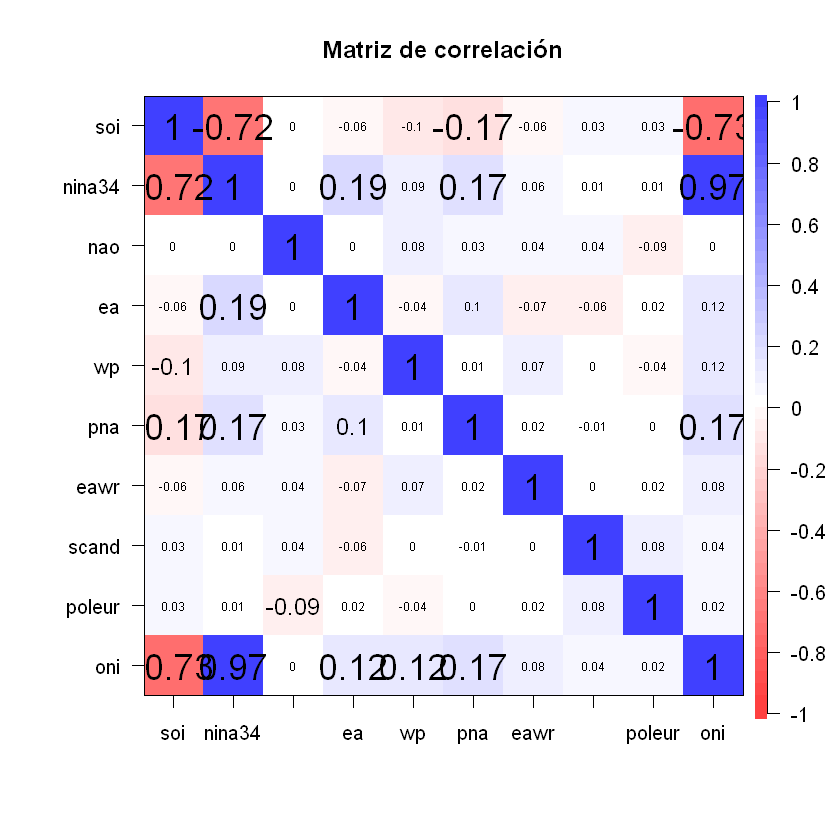

In [19]:
l = list(nina34, nao, ea, wp, pna, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

library(psych)
colnames(M) = c('soi', 'nina34', 'nao', 'ea', 'wp', 'pna', 'eawr', 'scand', 'poleur', 'oni')
corPlot(M, cex = 1.2, main = "Matriz de correlación")

SOI, ONI and NINA34 are strongly correlated. Consequently, we only use the NINO34 index.


## Correlation per cluster

### Unimodal fire season

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

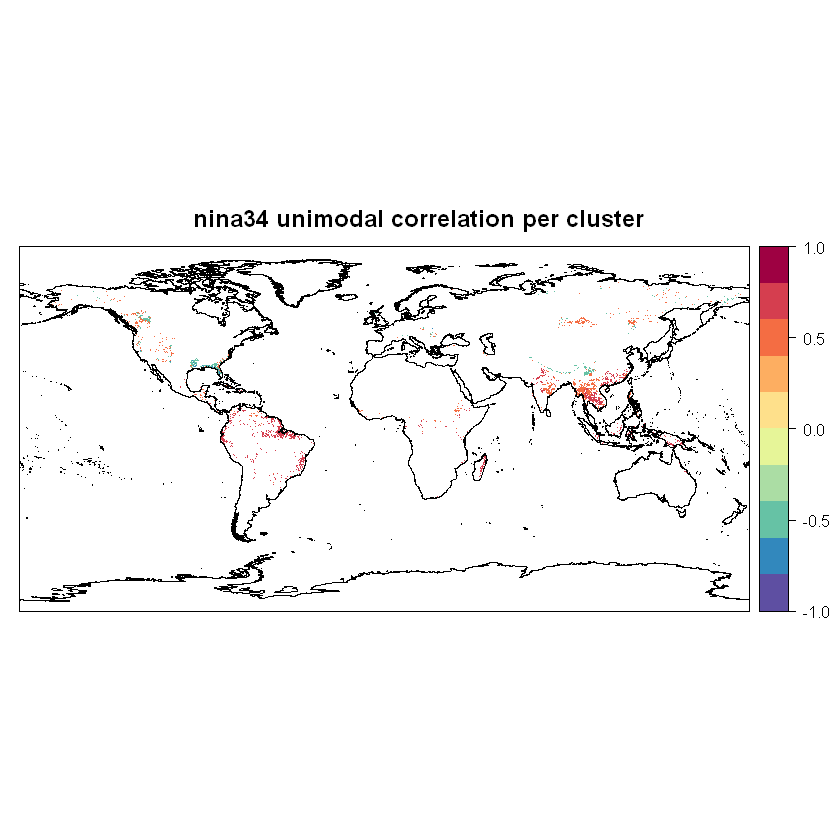

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

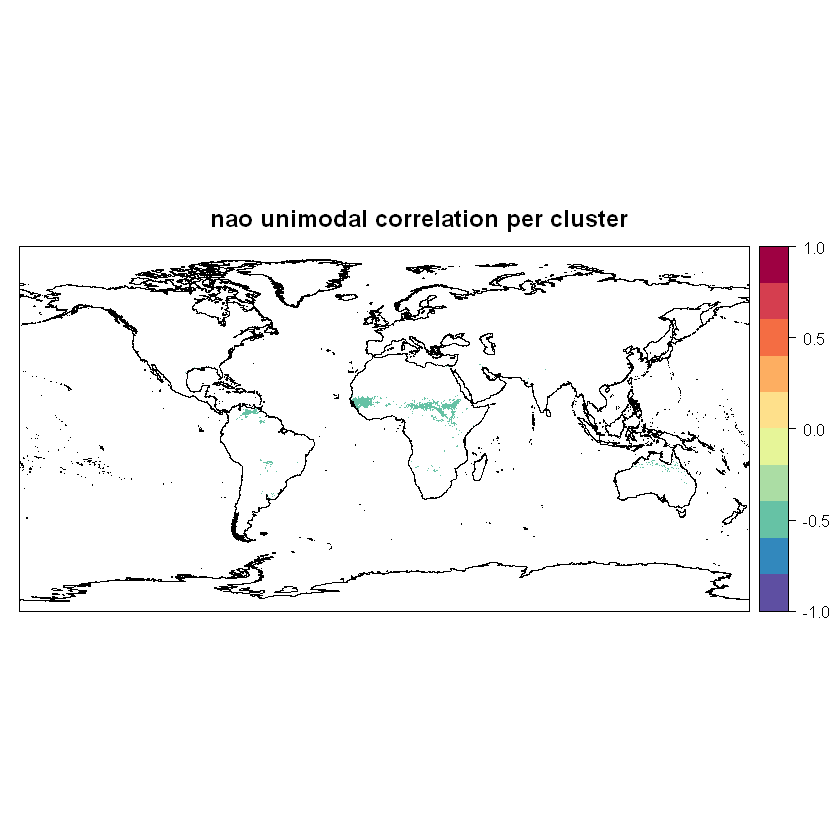

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

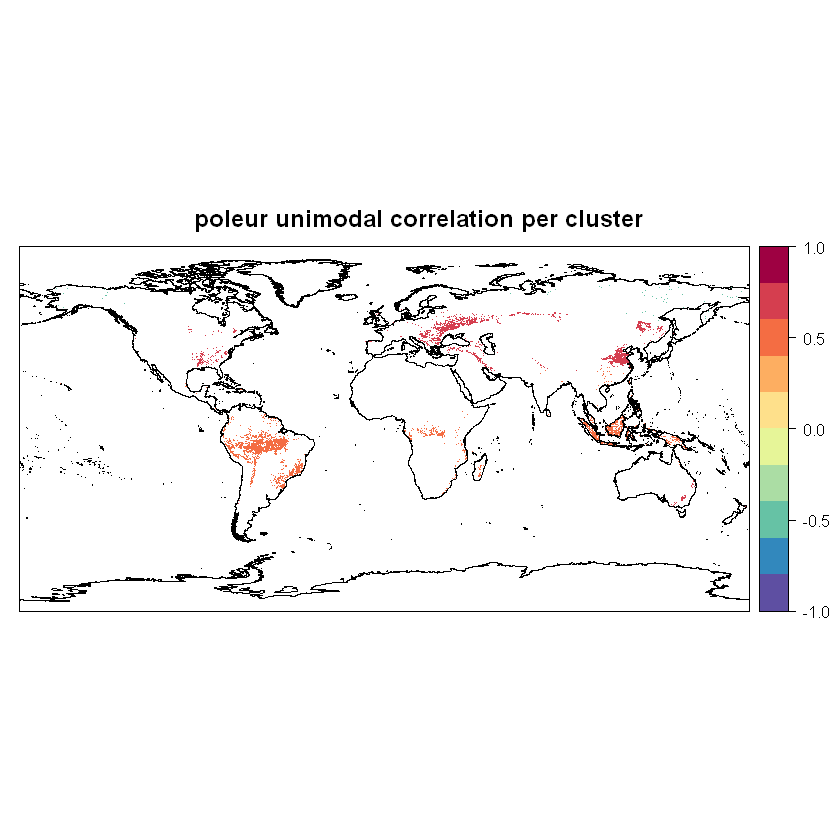

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

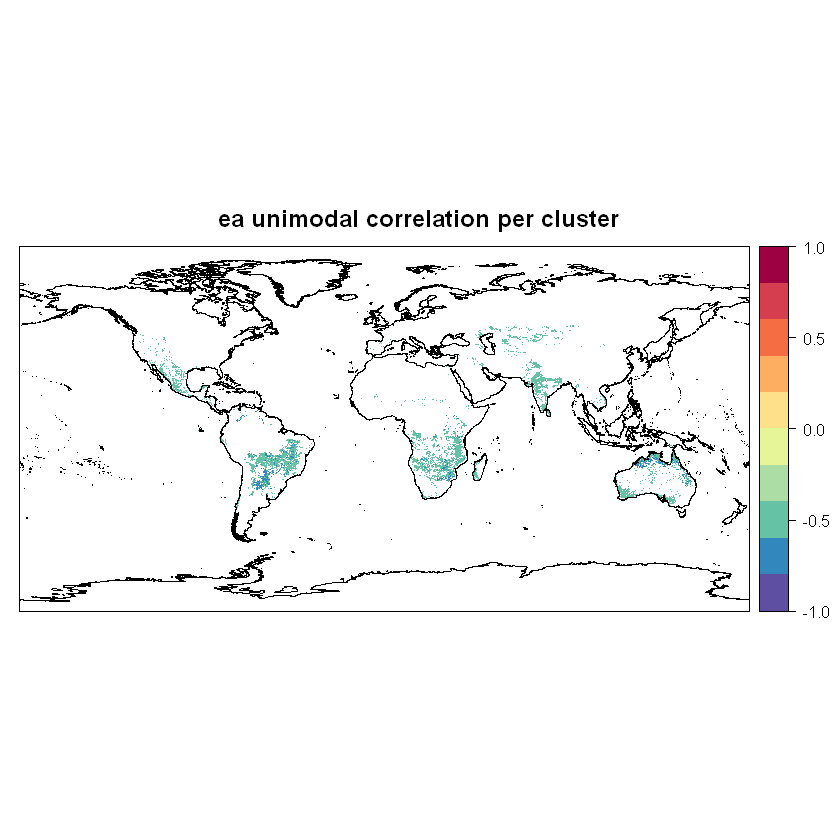

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

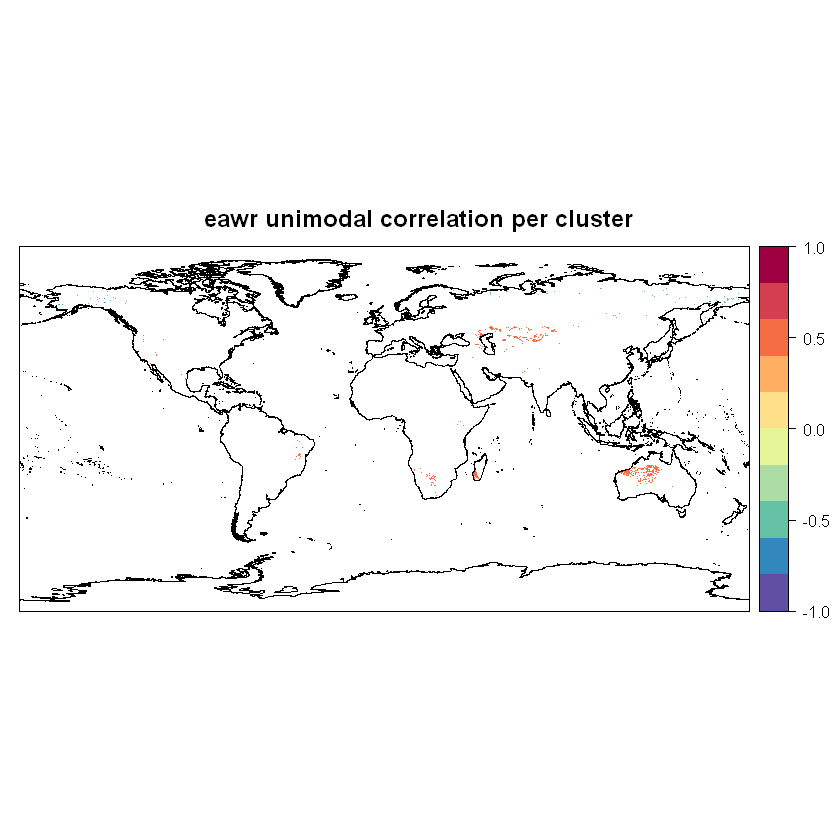

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

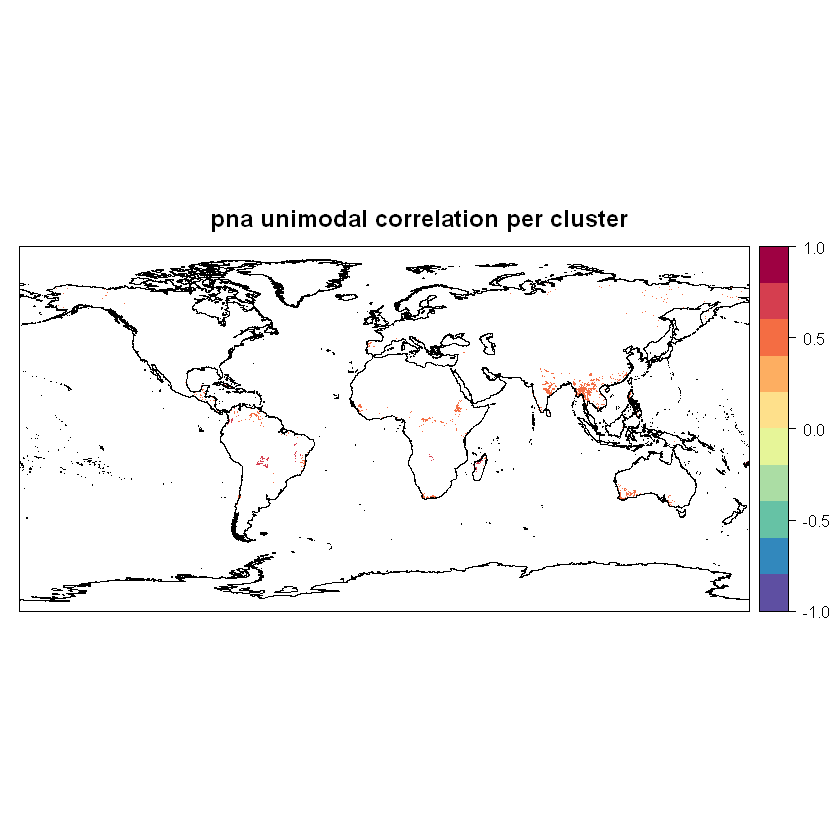

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

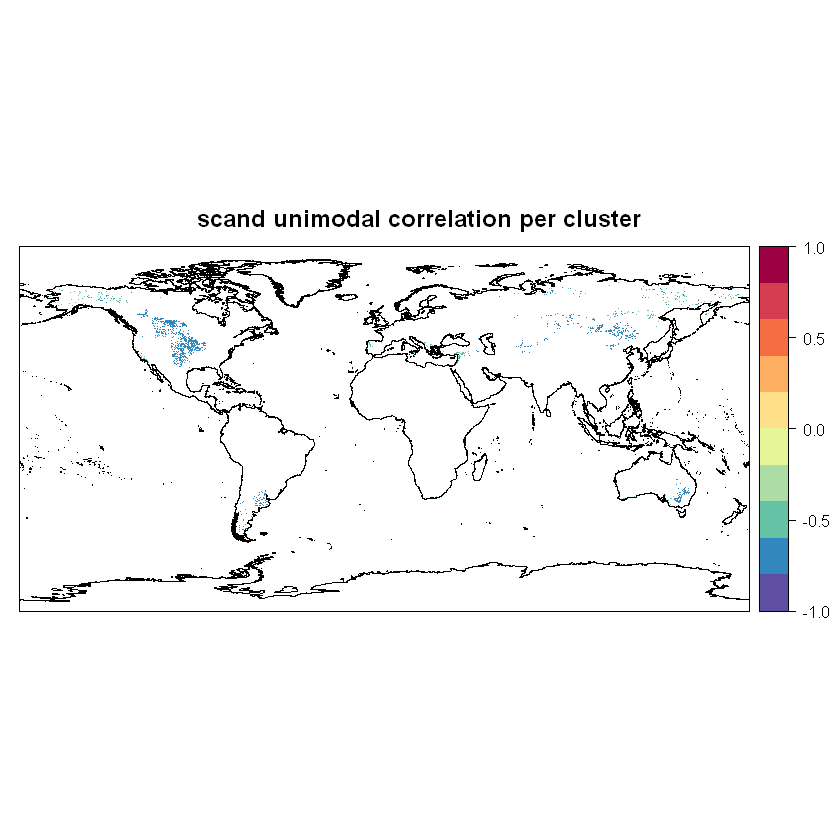

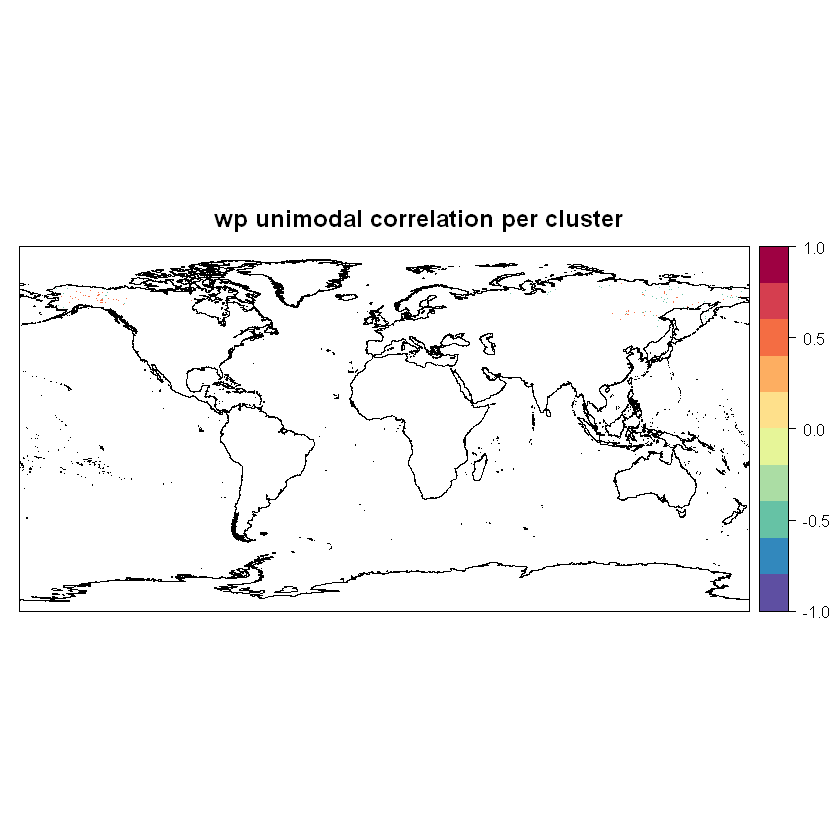

In [17]:
corr.df = masked_coords
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df,
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df,
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df,
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df, 
                           mode = 'unimodal')

#save(corr.df, file = 'corrDfAnnualClus.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  32407 
Number of pixels correlated with more than  1  indexes  2368 
Number of pixels correlated with more than  2  indexes  144 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


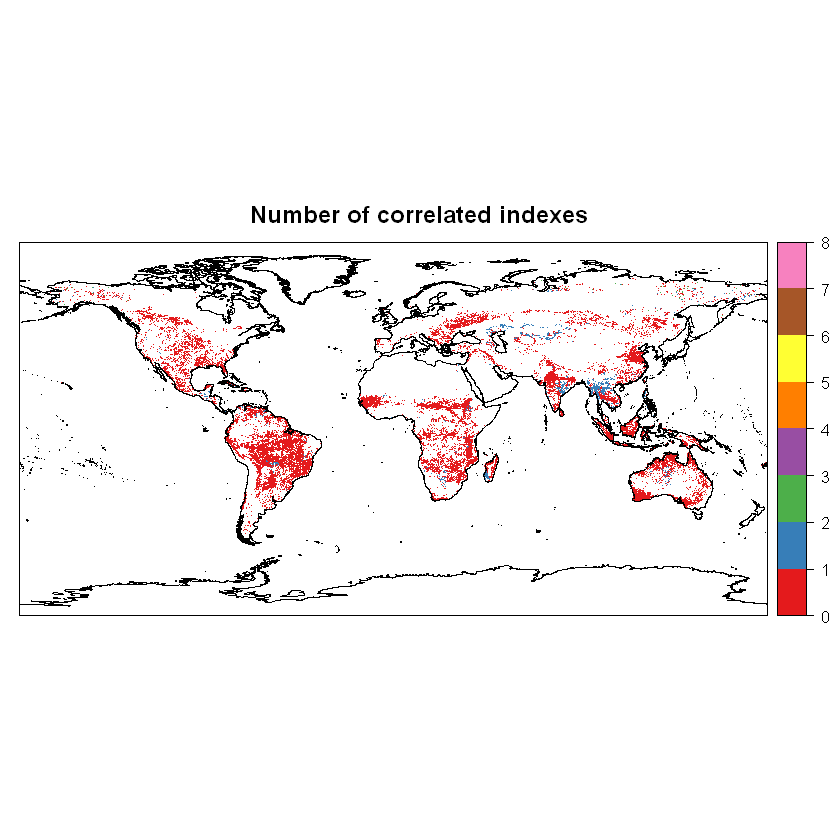

In [18]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao.pvalue<0.05), as.numeric(corr.df$poleur.pvalue<0.05), as.numeric(corr.df$ea.pvalue<0.05),
          as.numeric(corr.df$eawr.pvalue<0.05), as.numeric(corr.df$pna.pvalue<0.05), as.numeric(corr.df$nina34.pvalue<0.05), 
          as.numeric(corr.df$scand.pvalue<0.05), as.numeric(corr.df$wp.pvalue<0.05))

corr.df$suma = rowSums(v, na.rm=T)
v <- corr.df$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df$suma > i-1), '\n')
}

### Main fire season of bimodals fire seasons

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

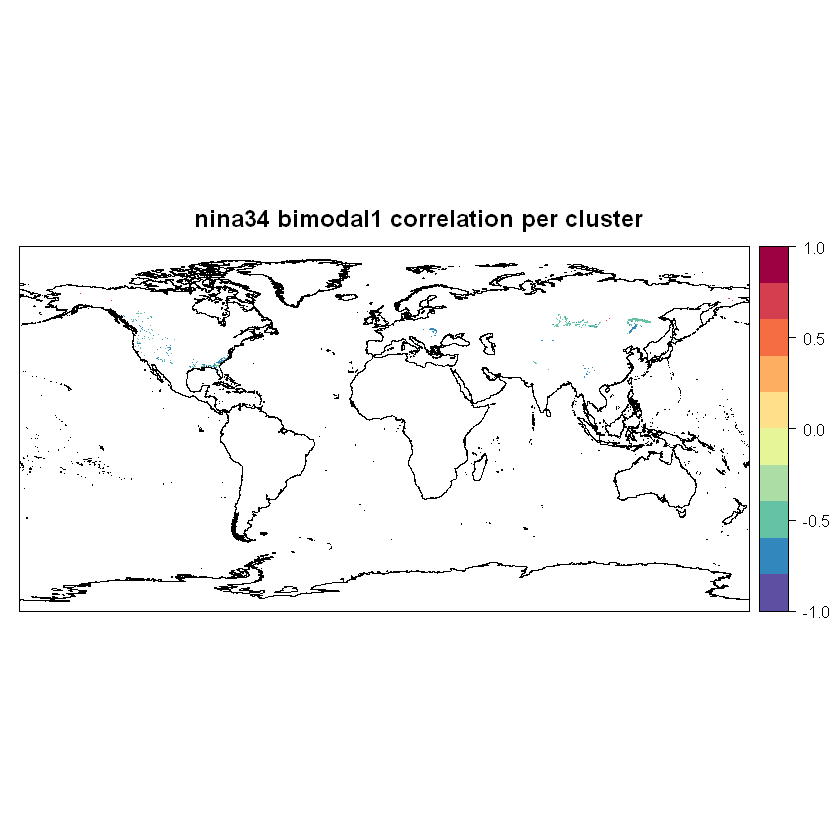

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

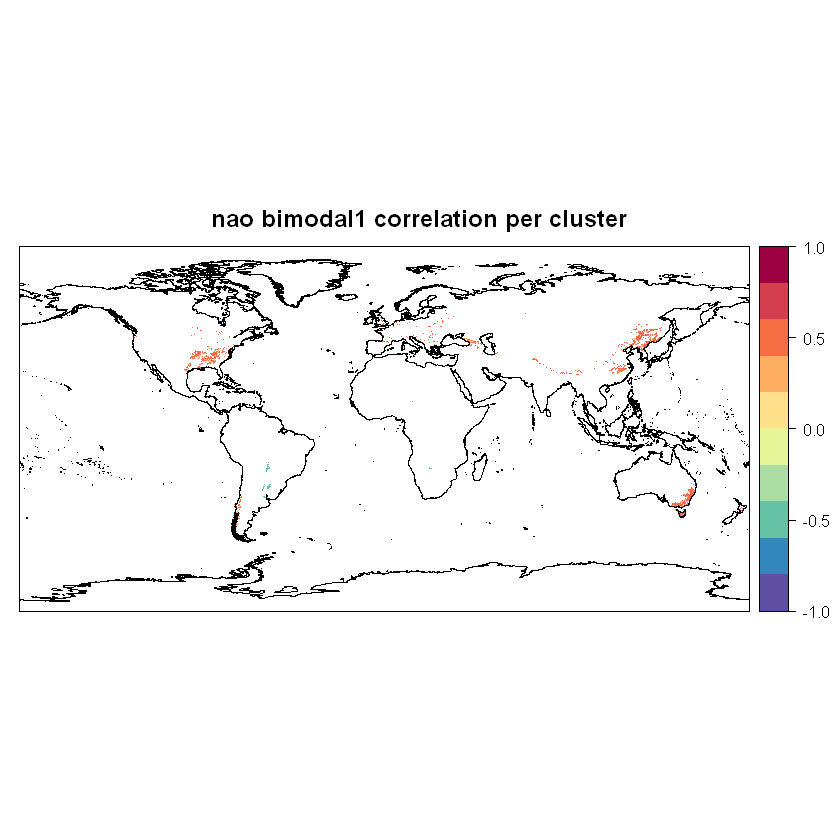

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

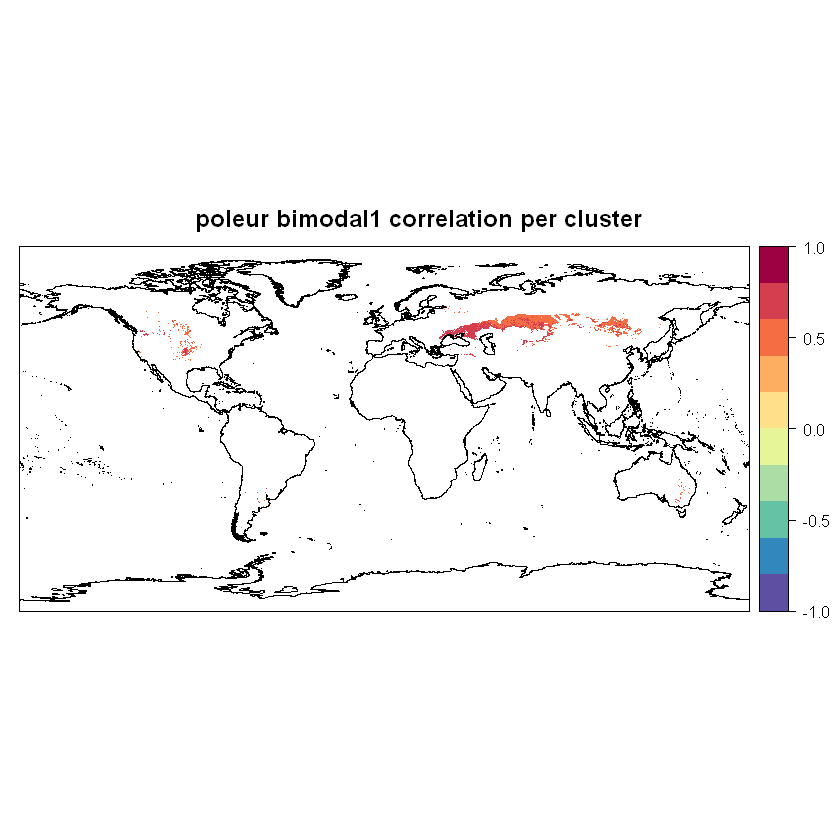

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

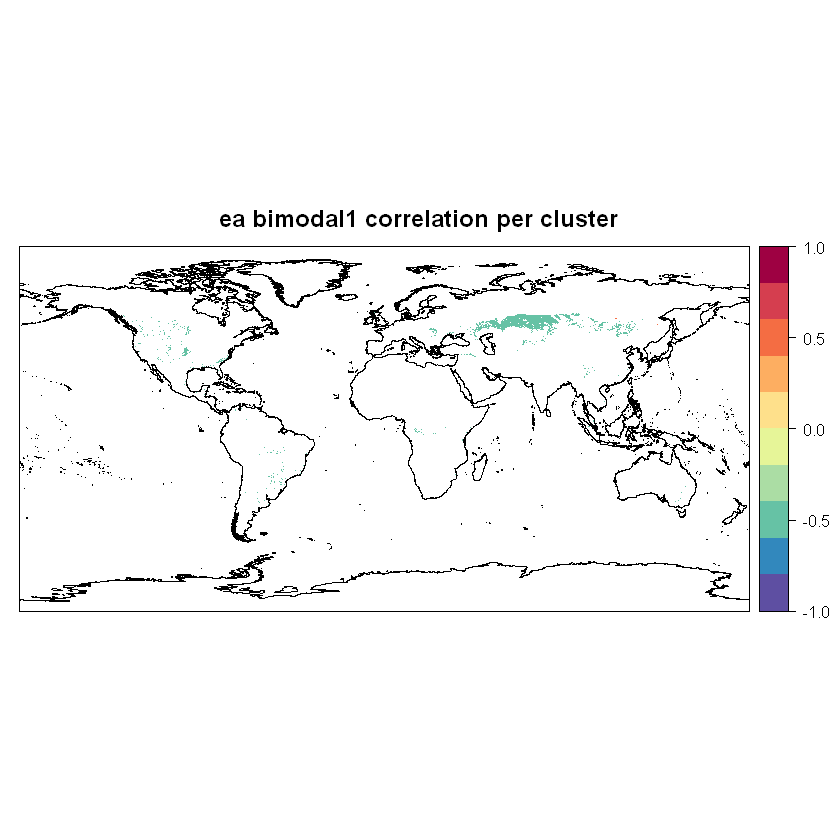

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

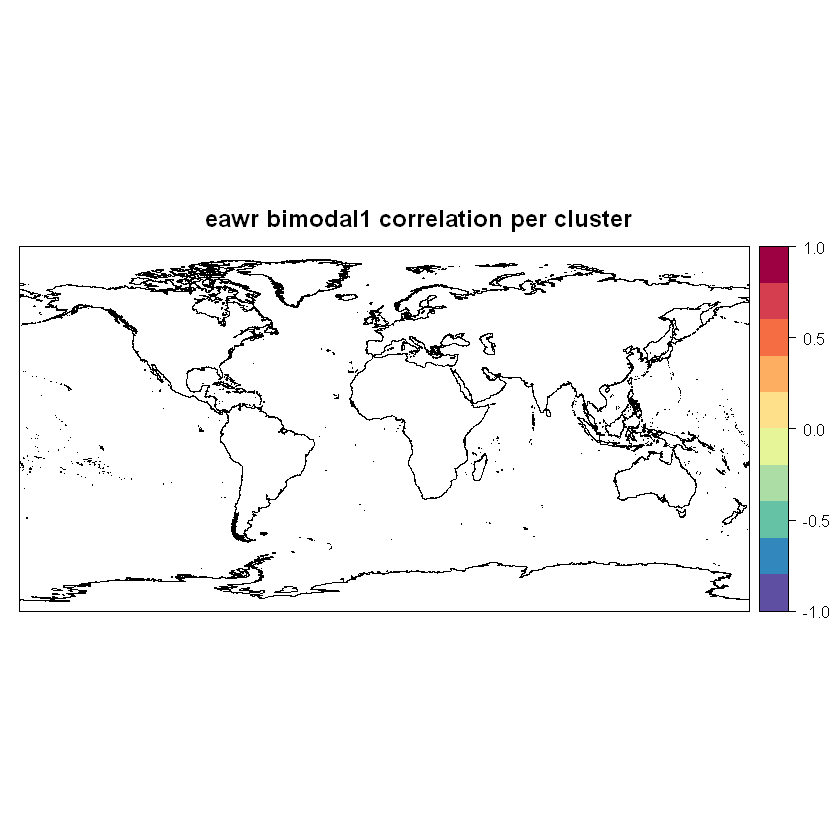

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

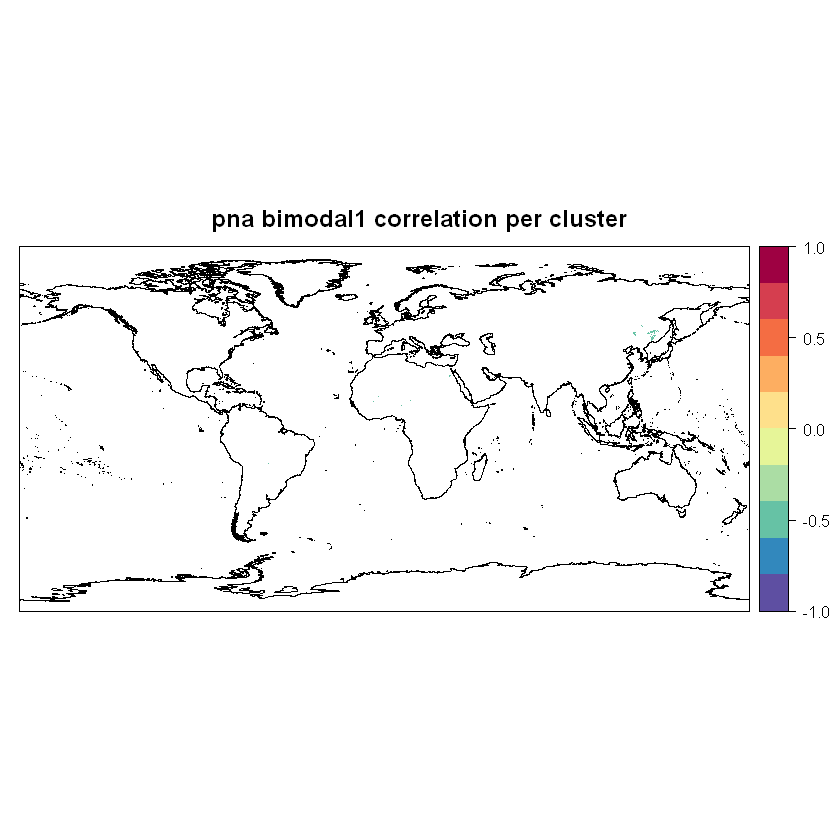

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

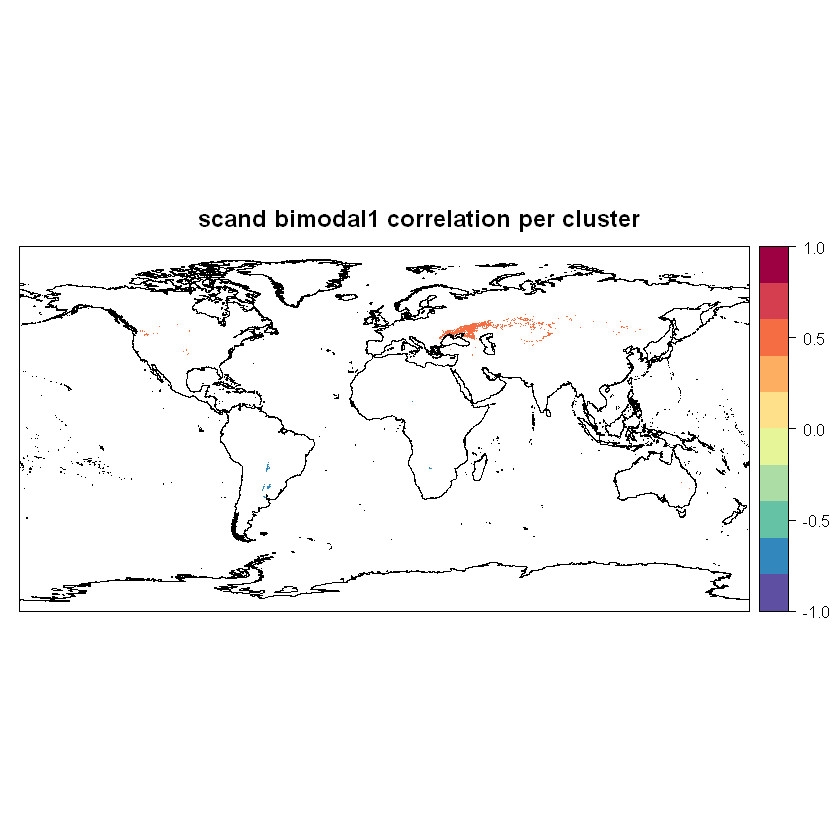

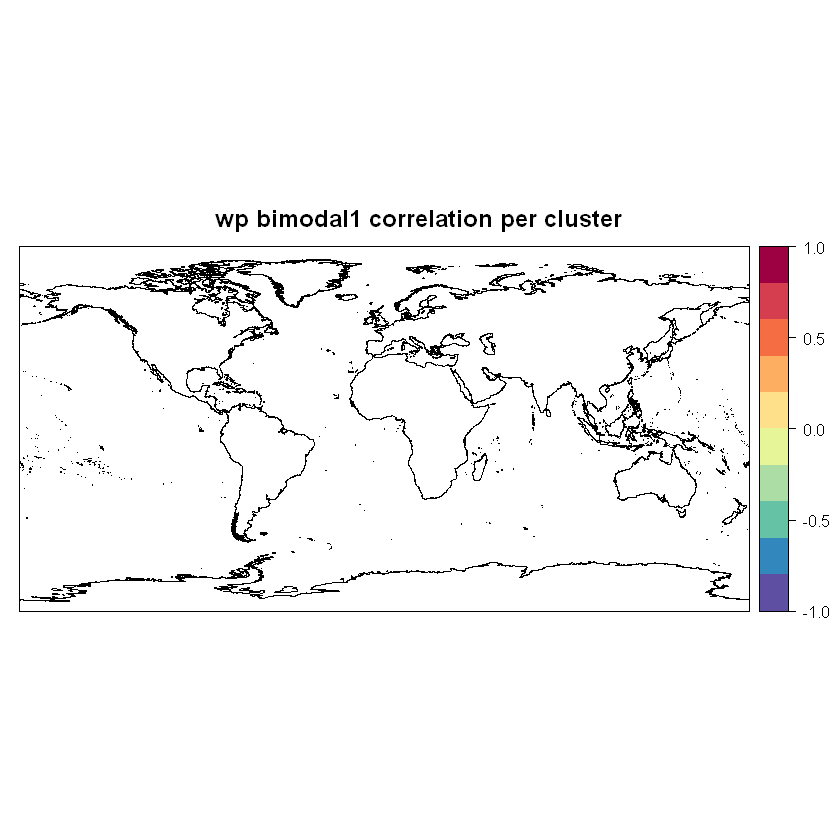

In [19]:
corr.df.2 = masked_coords
mode = 'bimodal1'
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df.2, 
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df.2, 
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df.2, 
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df.2, 
                             mode = mode)

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  10524 
Number of pixels correlated with more than  1  indexes  5539 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


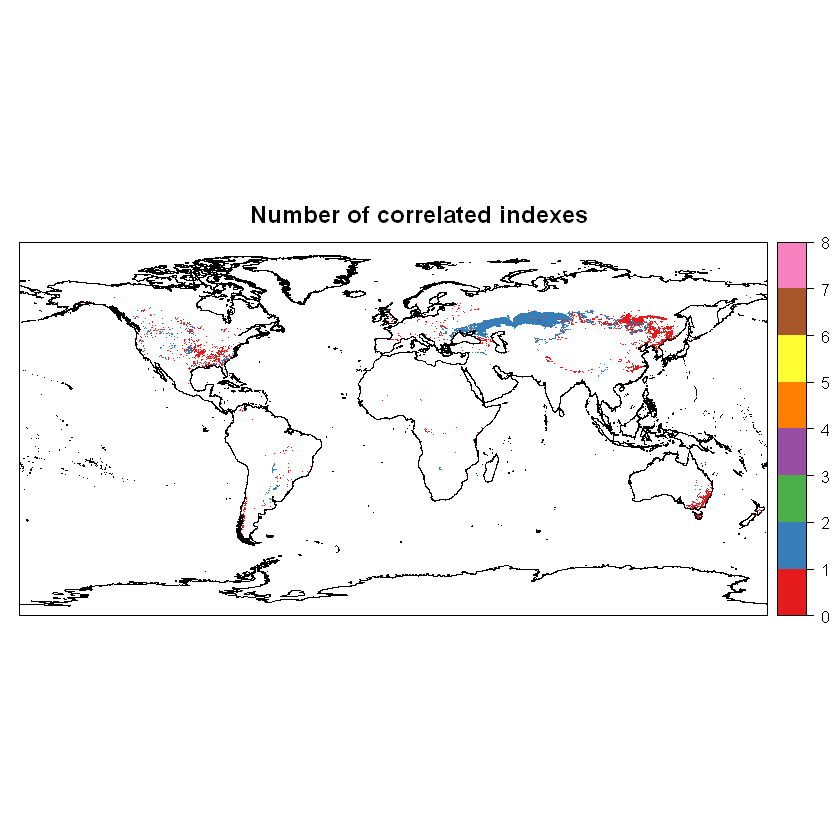

In [20]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2$nao.1.pvalue<0.05), as.numeric(corr.df.2$poleur.1.pvalue<0.05), as.numeric(corr.df.2$ea.1.pvalue<0.05),
          as.numeric(corr.df.2$eawr.1.pvalue<0.05), as.numeric(corr.df.2$pna.1.pvalue<0.05), as.numeric(corr.df.2$nina34.1.pvalue<0.05), 
          as.numeric(corr.df.2$scand.1.pvalue<0.05), as.numeric(corr.df.2$wp.1.pvalue<0.05))

corr.df.2$suma = rowSums(v, na.rm=T)
v <- corr.df.2$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.2$suma > i-1), '\n')
}

## Con persistencia de un mes

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

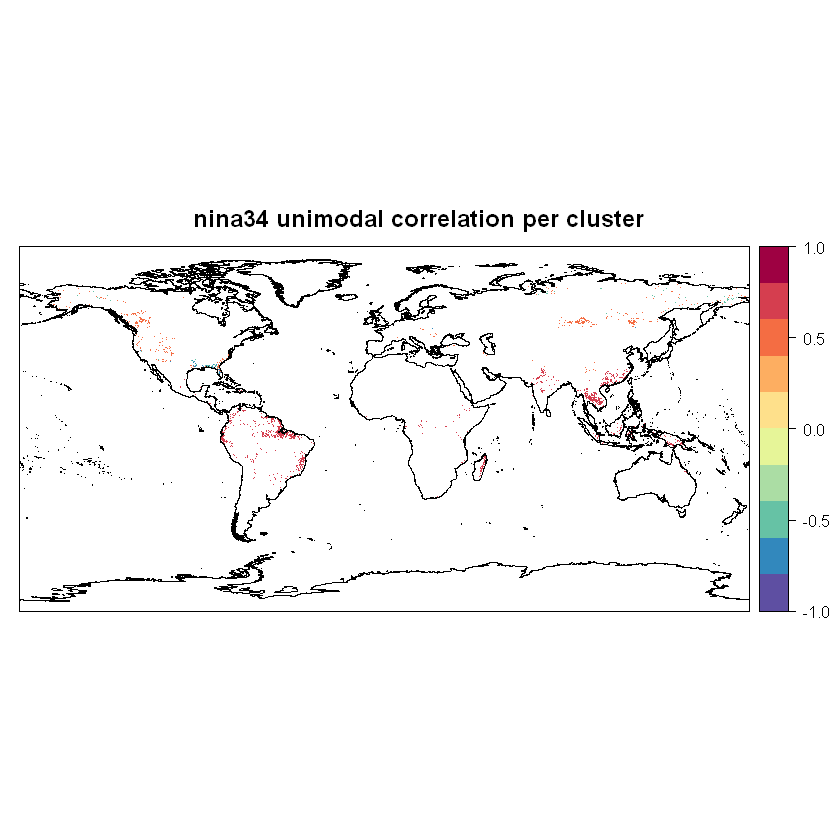

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

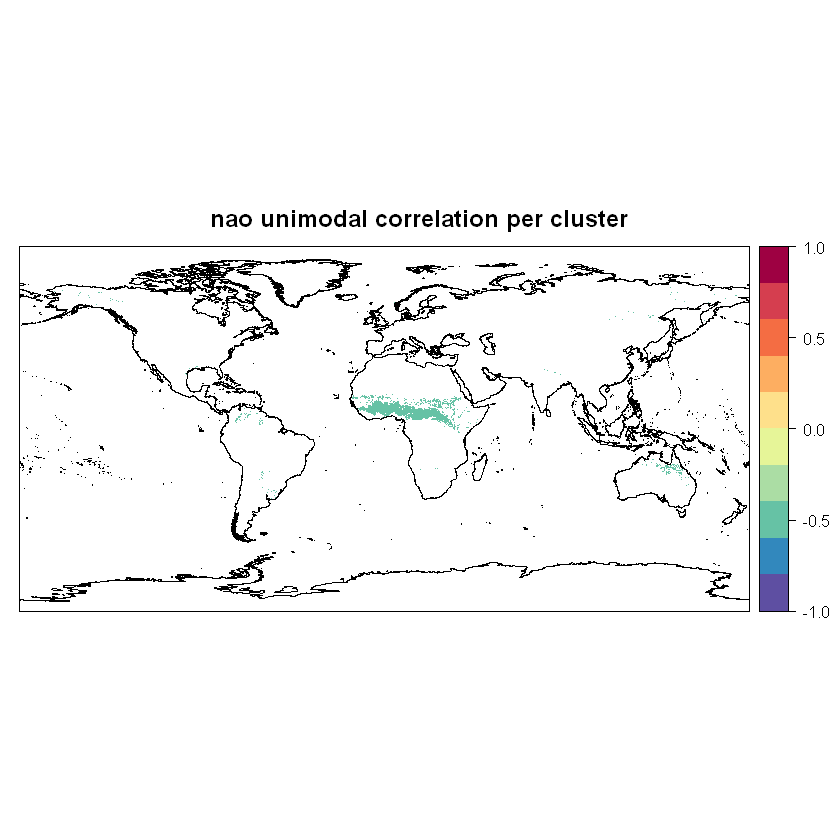

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

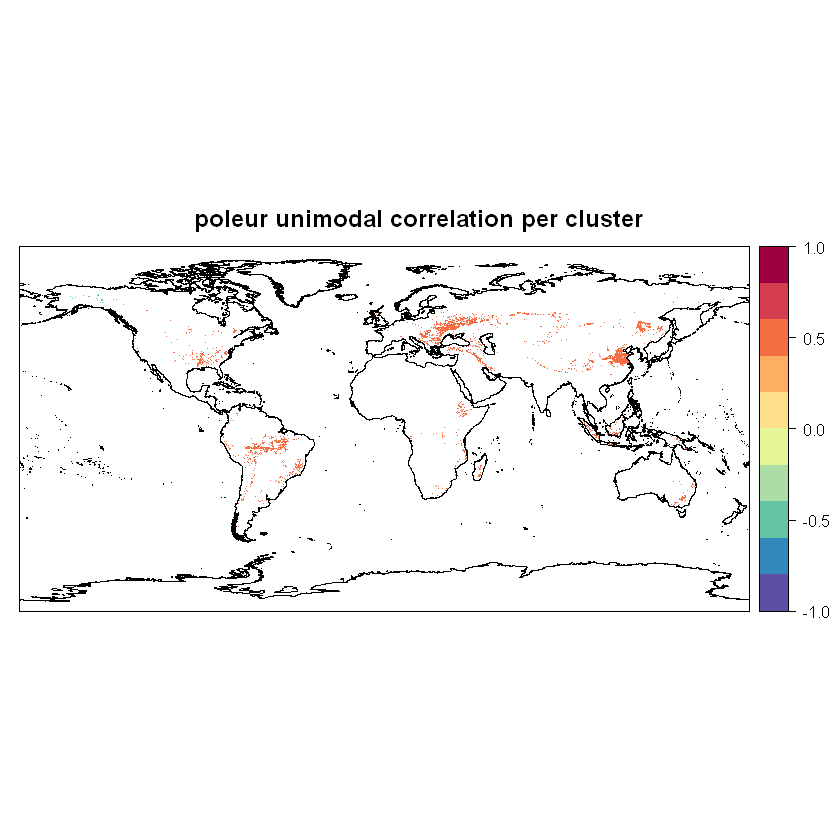

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

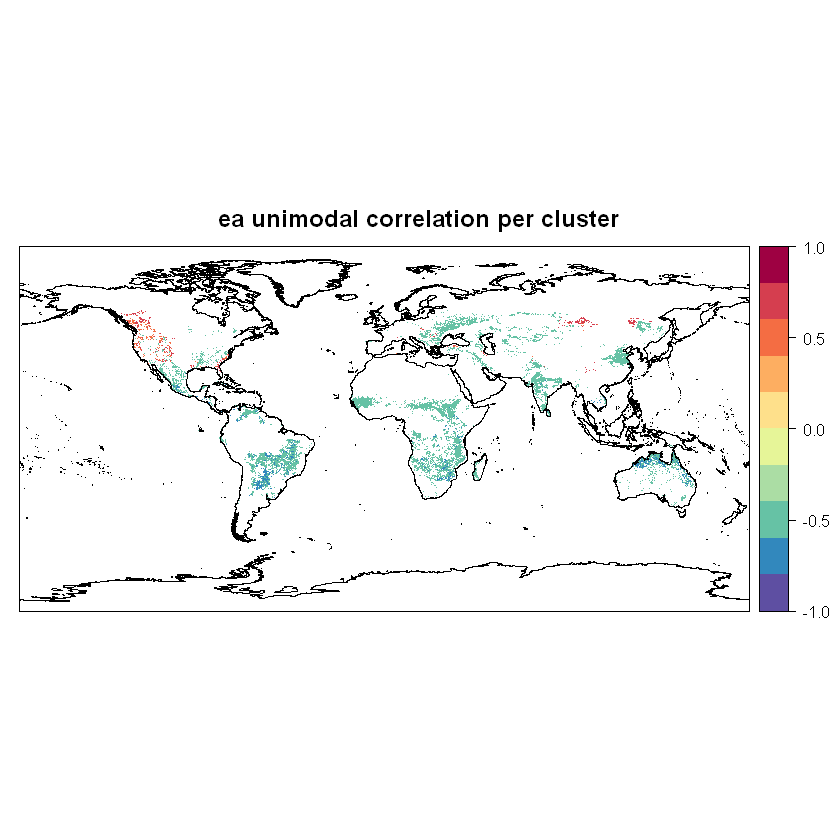

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

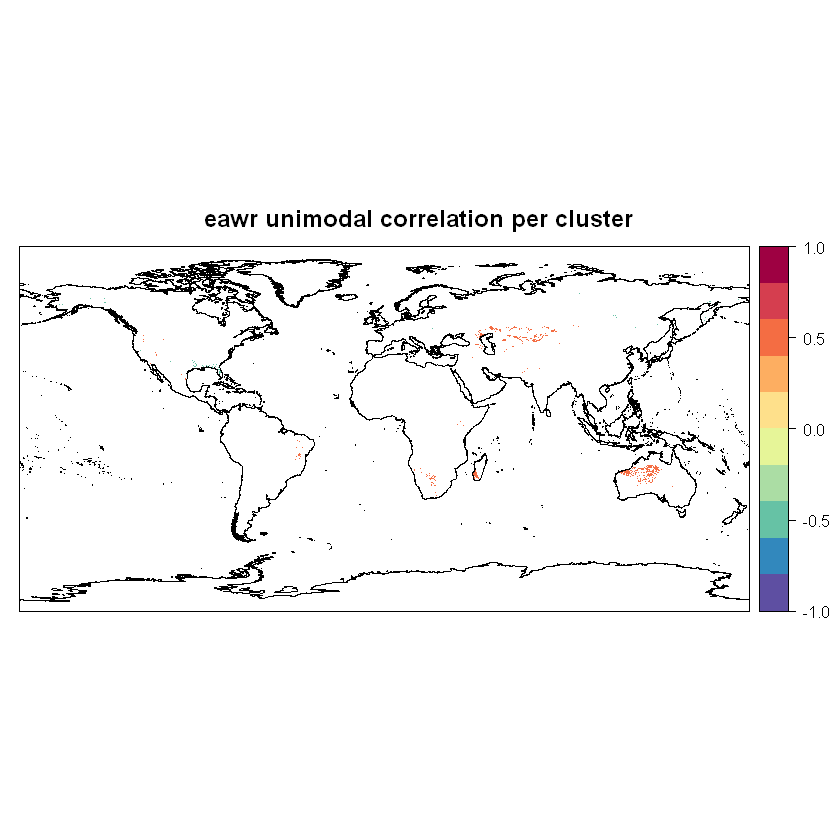

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

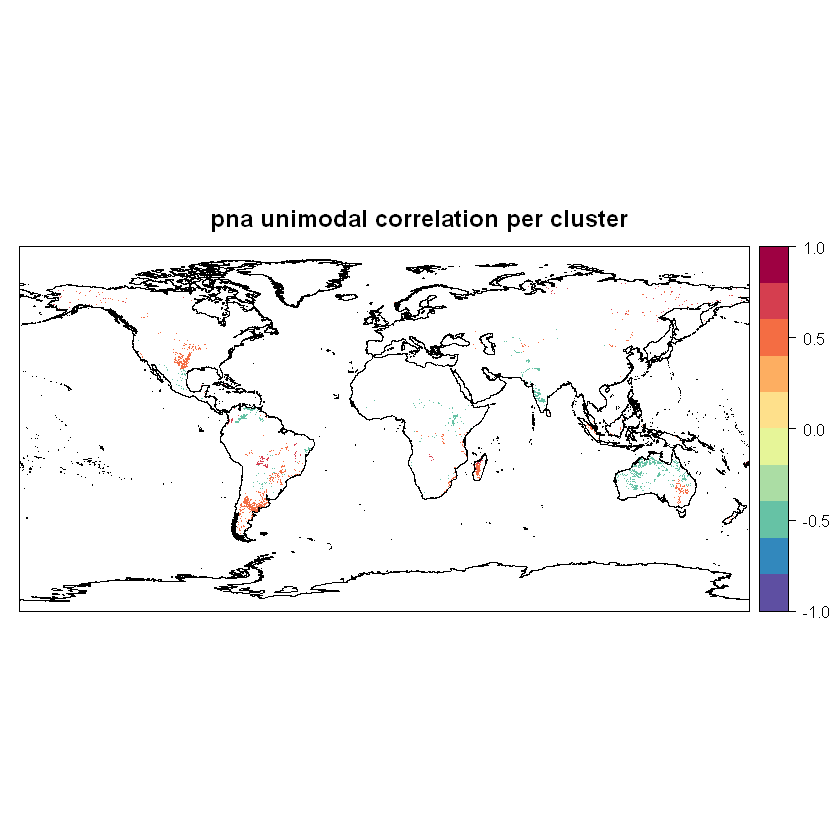

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

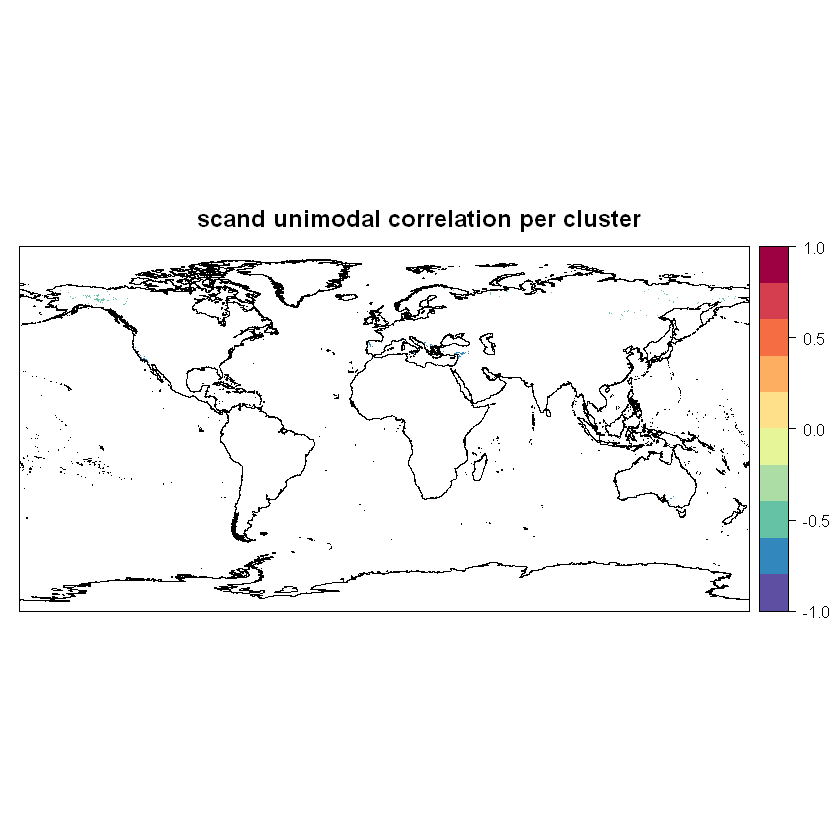

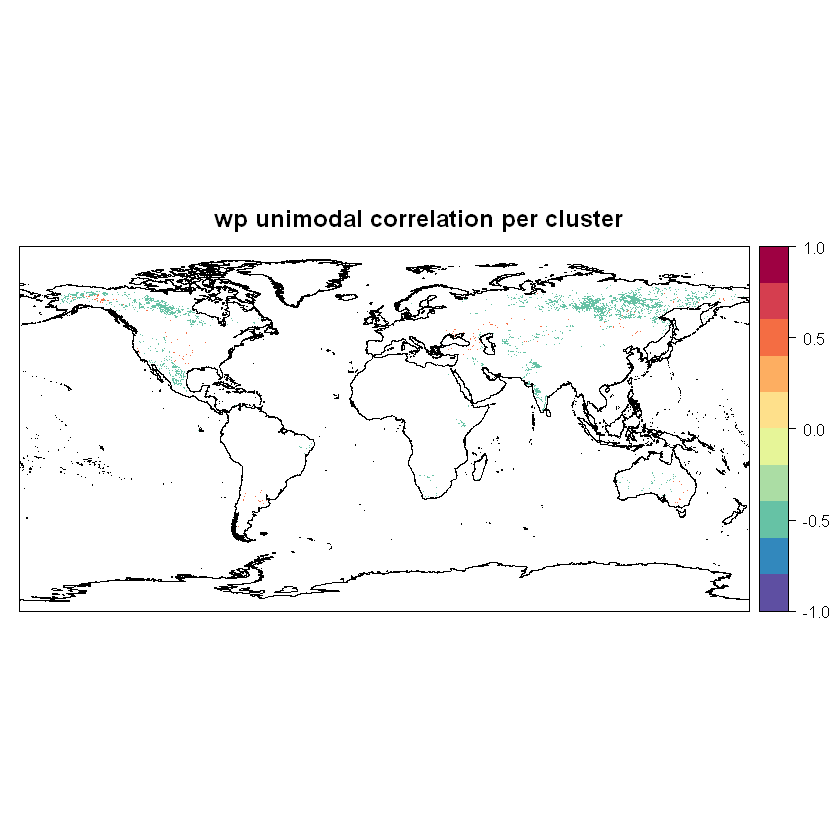

In [29]:
corr.df = masked_coords
t = 1
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df, 
                           mode = 'unimodal', t = t)

corr.df.lag.1 <- corr.df
save(corr.df.lag.1, file = 'corrDfAnnualClusLag1.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  37071 
Number of pixels correlated with more than  1  indexes  6700 
Number of pixels correlated with more than  2  indexes  75 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


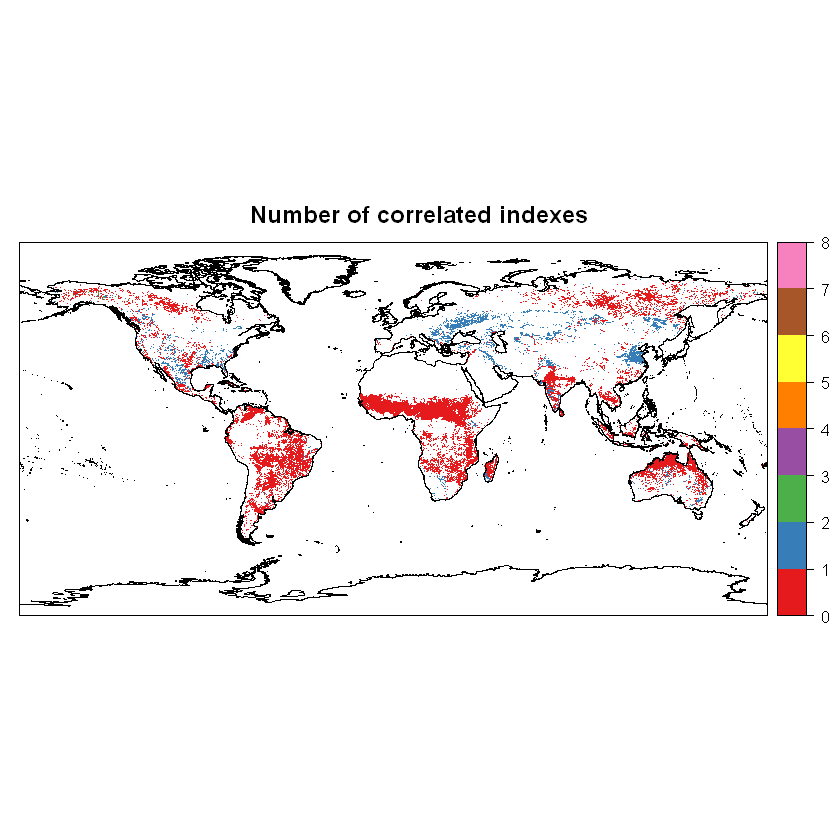

In [30]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao.pvalue<0.05), as.numeric(corr.df$poleur.pvalue<0.05), as.numeric(corr.df$ea.pvalue<0.05),
          as.numeric(corr.df$eawr.pvalue<0.05), as.numeric(corr.df$pna.pvalue<0.05), as.numeric(corr.df$nina34.pvalue<0.05), 
          as.numeric(corr.df$scand.pvalue<0.05), as.numeric(corr.df$wp.pvalue<0.05))

corr.df$suma = rowSums(v, na.rm=T)
v <- corr.df$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df$suma > i-1), '\n')
}

## Con persistencia de 2 meses

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

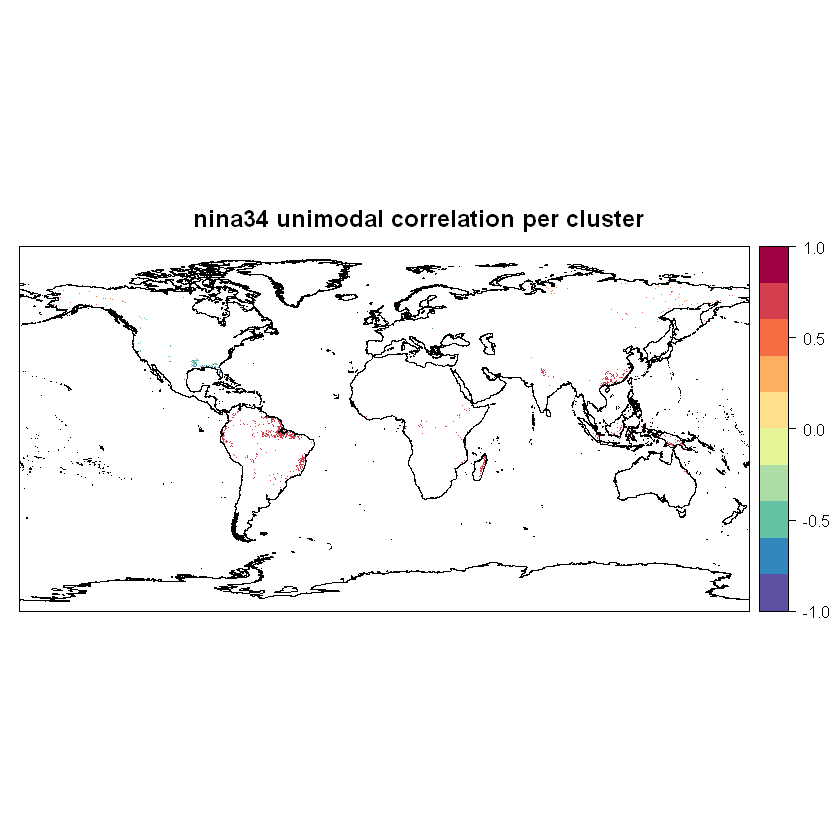

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

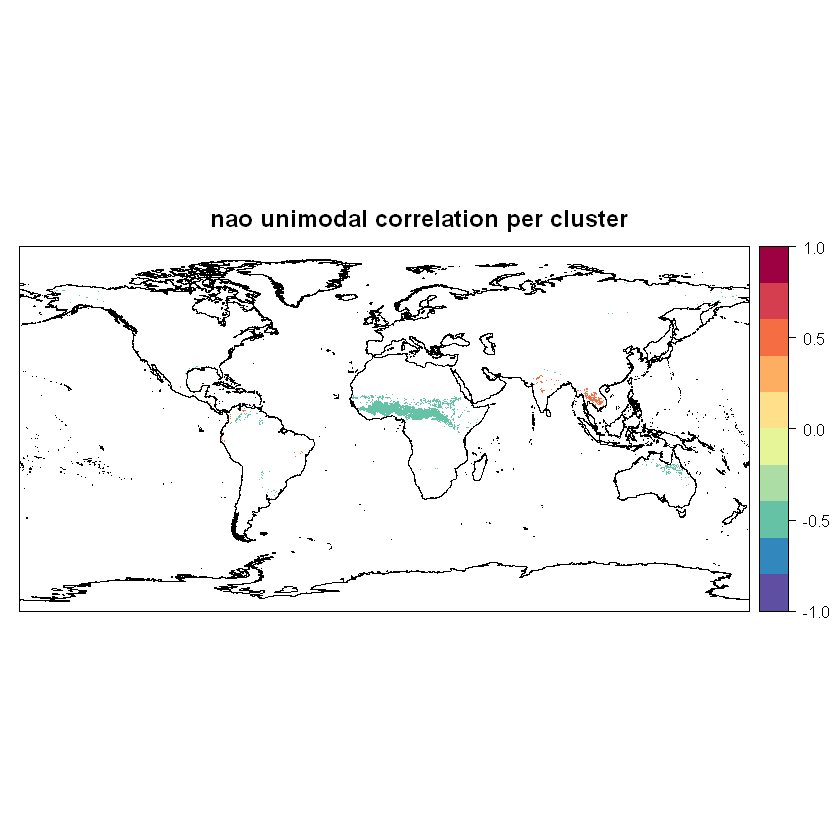

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

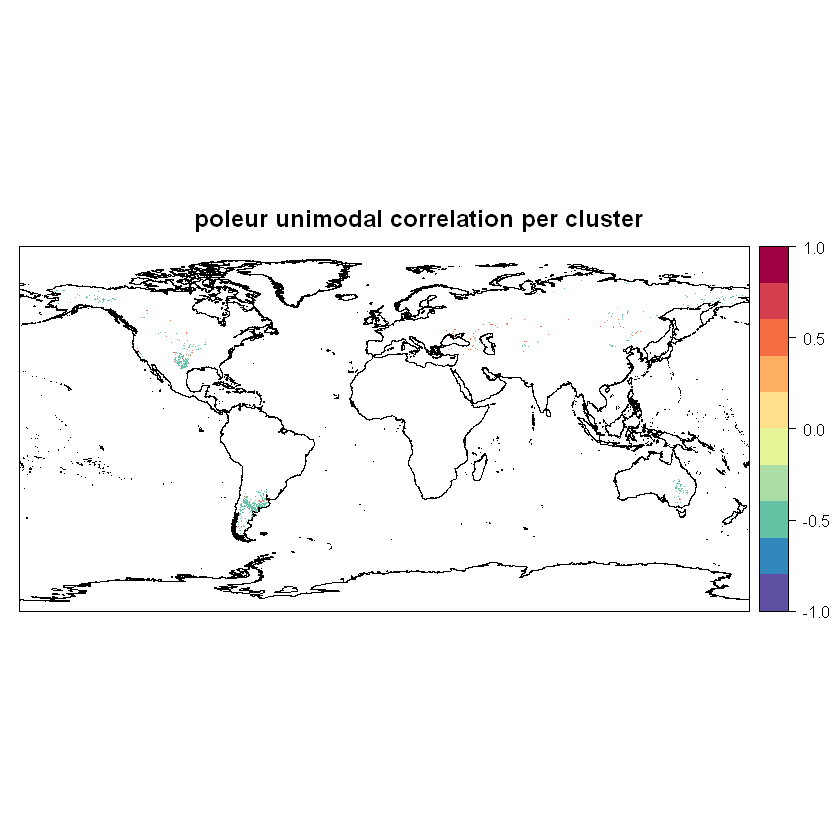

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

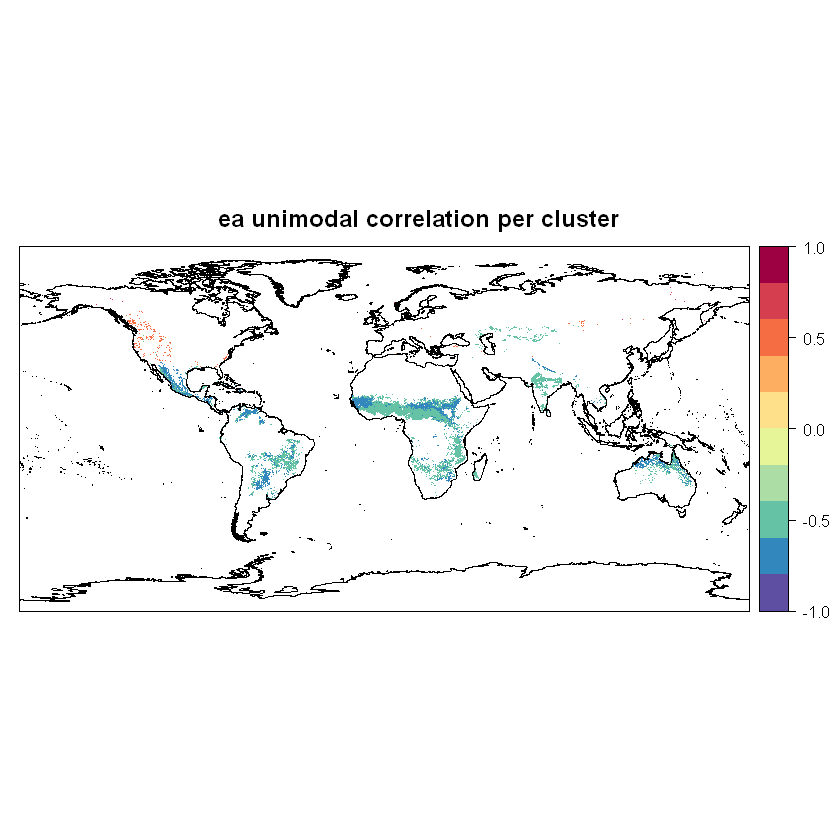

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

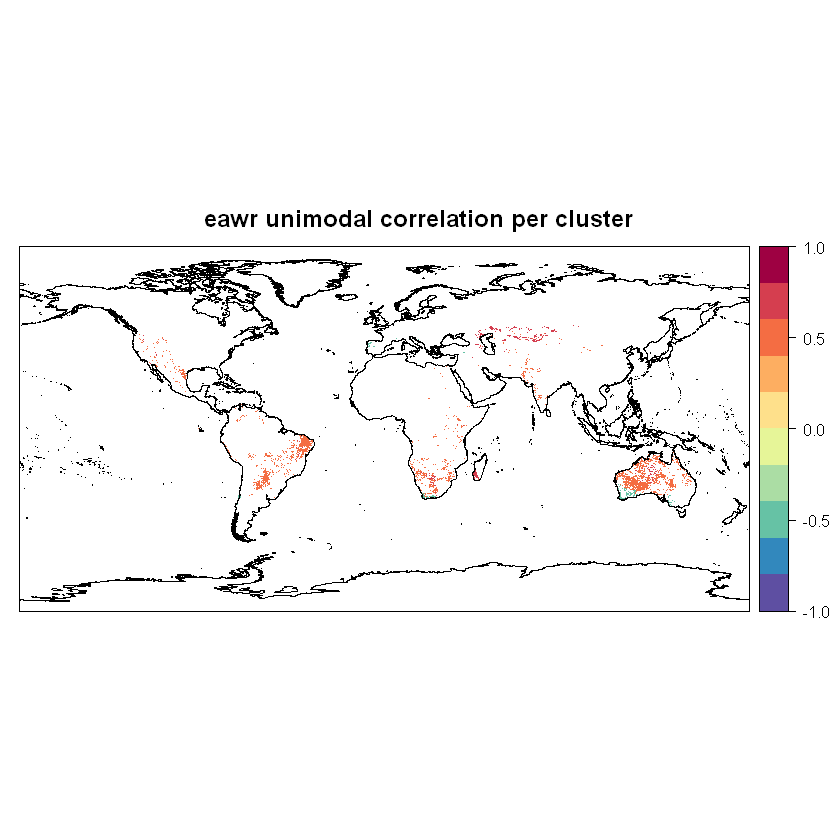

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

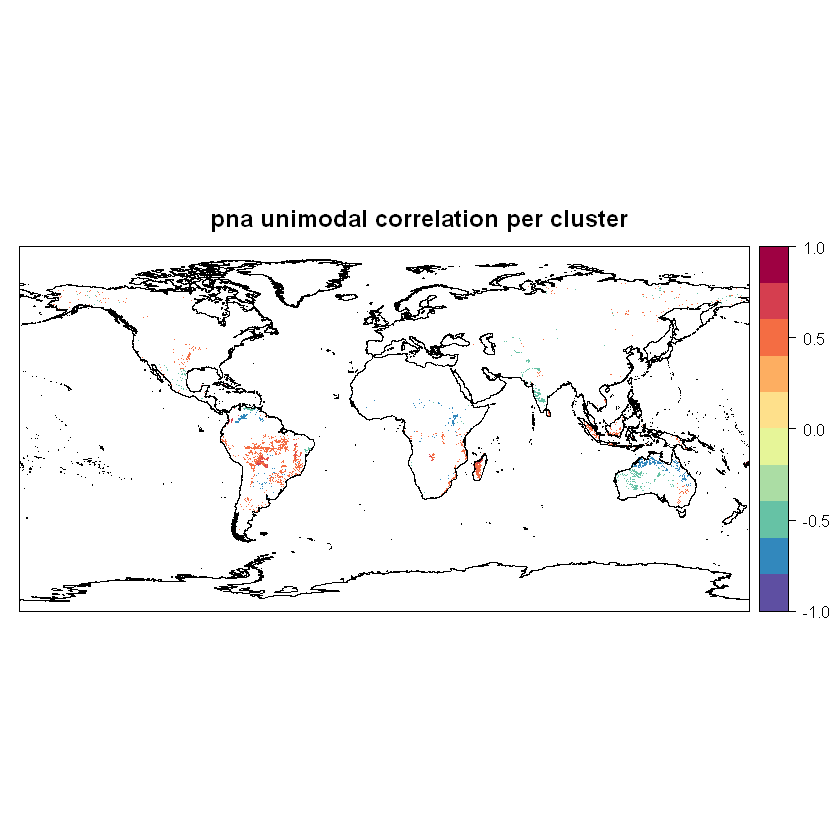

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

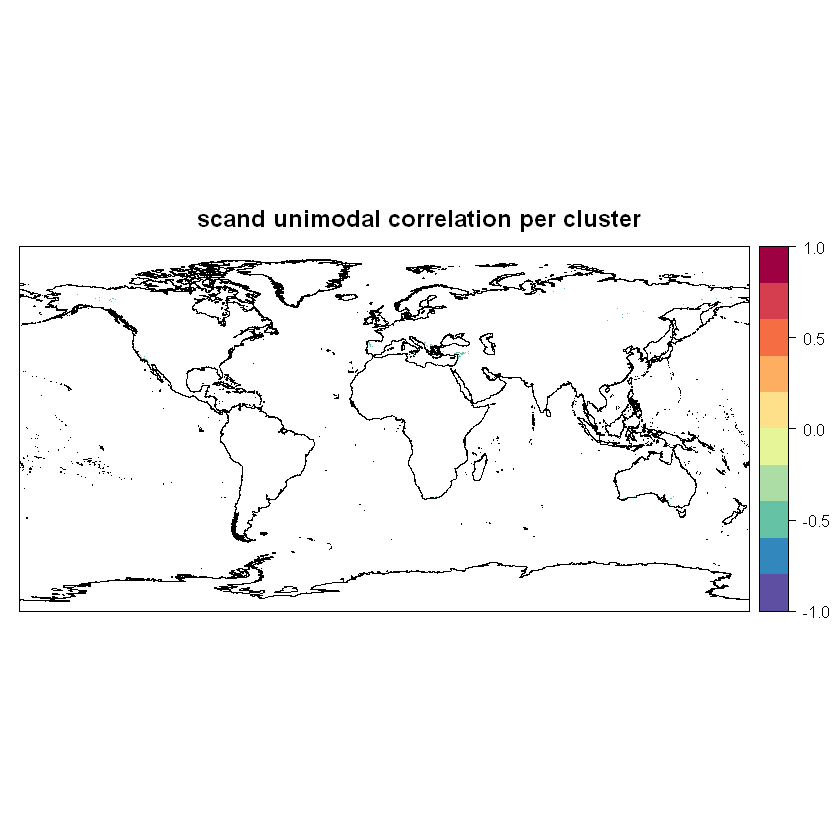

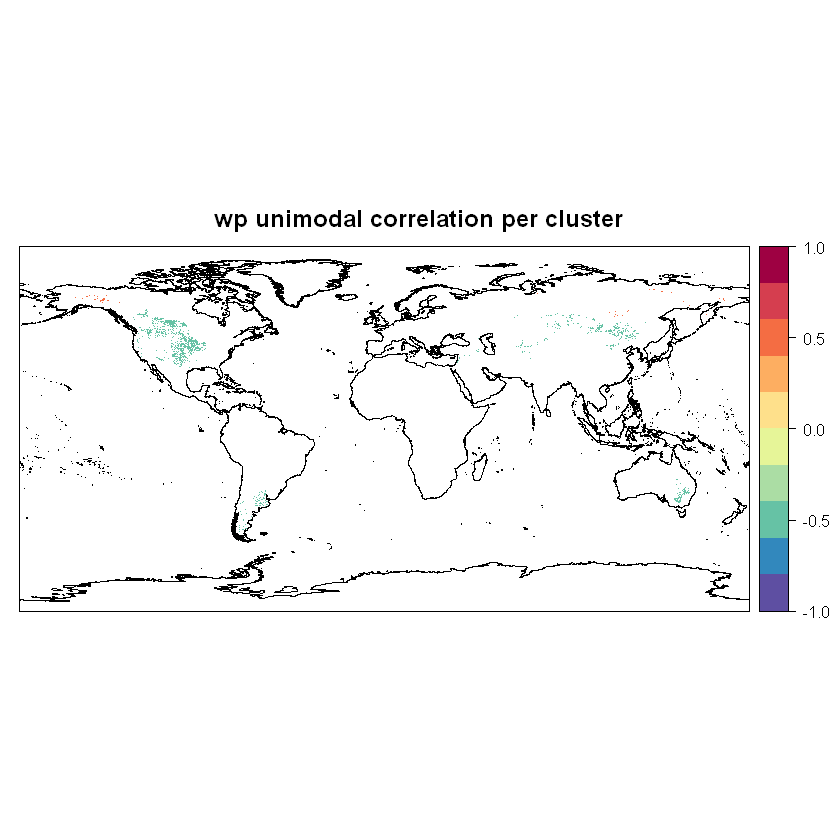

In [31]:
corr.df = masked_coords
t = 2
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df, 
                           mode = 'unimodal', t = t)

corr.df.lag.2 <- corr.df
save(corr.df.lag.2, file = 'corrDfAnnualClusLag2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  30573 
Number of pixels correlated with more than  1  indexes  7253 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


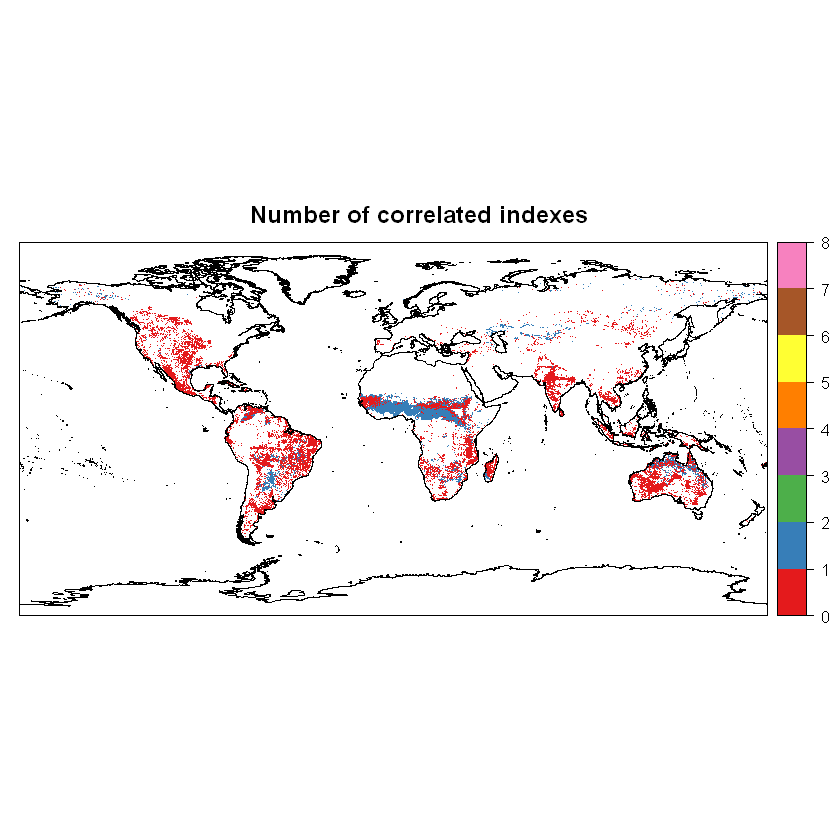

In [26]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao.pvalue<0.05), as.numeric(corr.df$poleur.pvalue<0.05), as.numeric(corr.df$ea.pvalue<0.05),
          as.numeric(corr.df$eawr.pvalue<0.05), as.numeric(corr.df$pna.pvalue<0.05), as.numeric(corr.df$nina34.pvalue<0.05), 
          as.numeric(corr.df$scand.pvalue<0.05), as.numeric(corr.df$wp.pvalue<0.05))

corr.df$suma = rowSums(v, na.rm=T)
v <- corr.df$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df$suma > i-1), '\n')
}

## Con persistencia de 3 meses

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

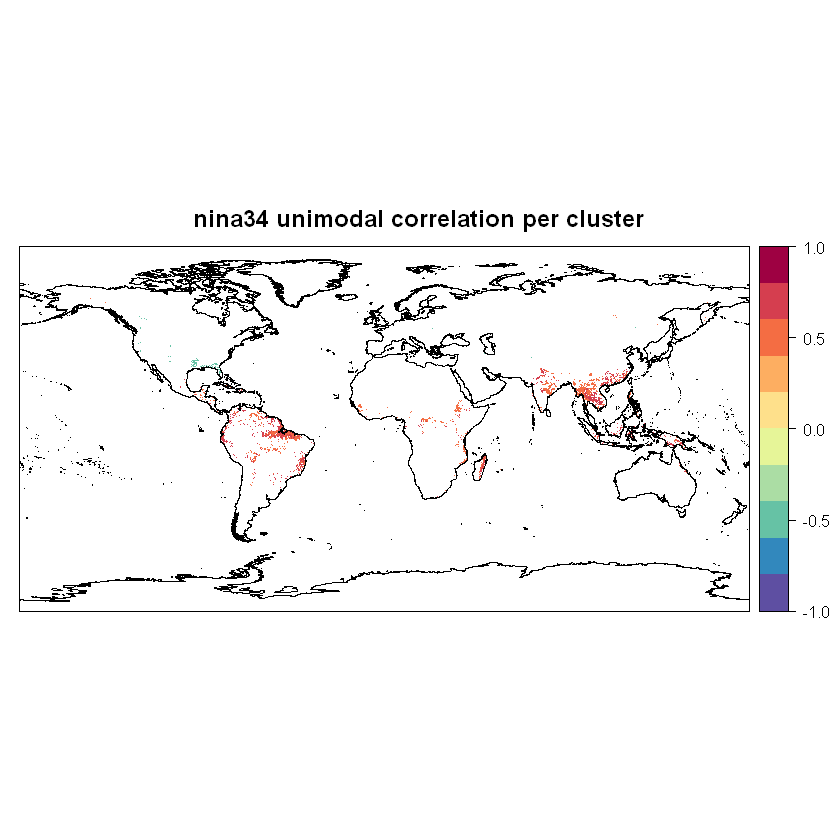

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

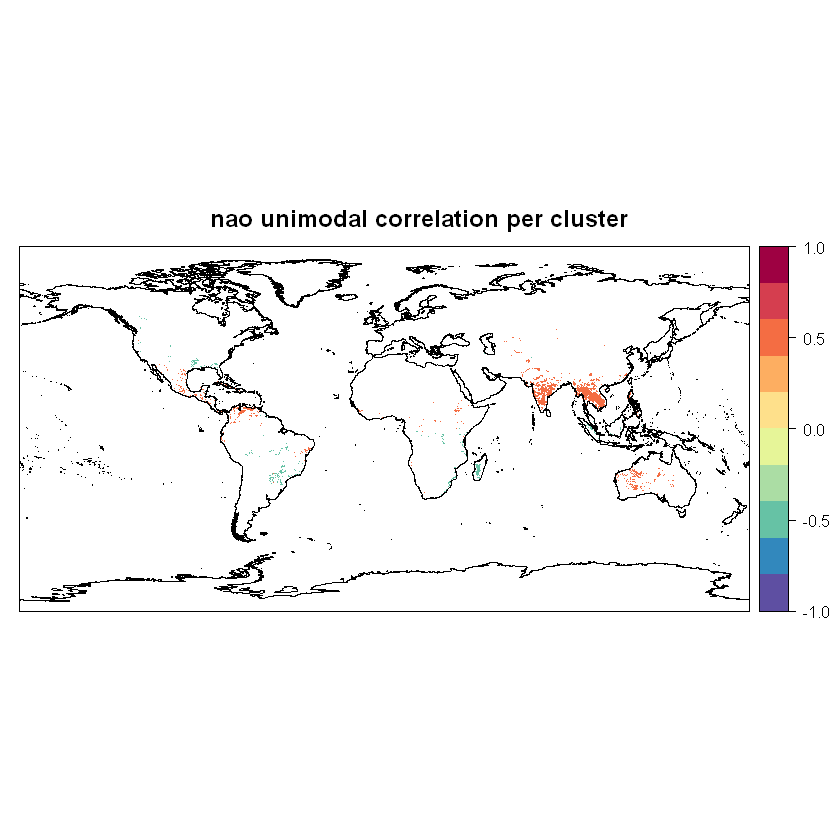

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

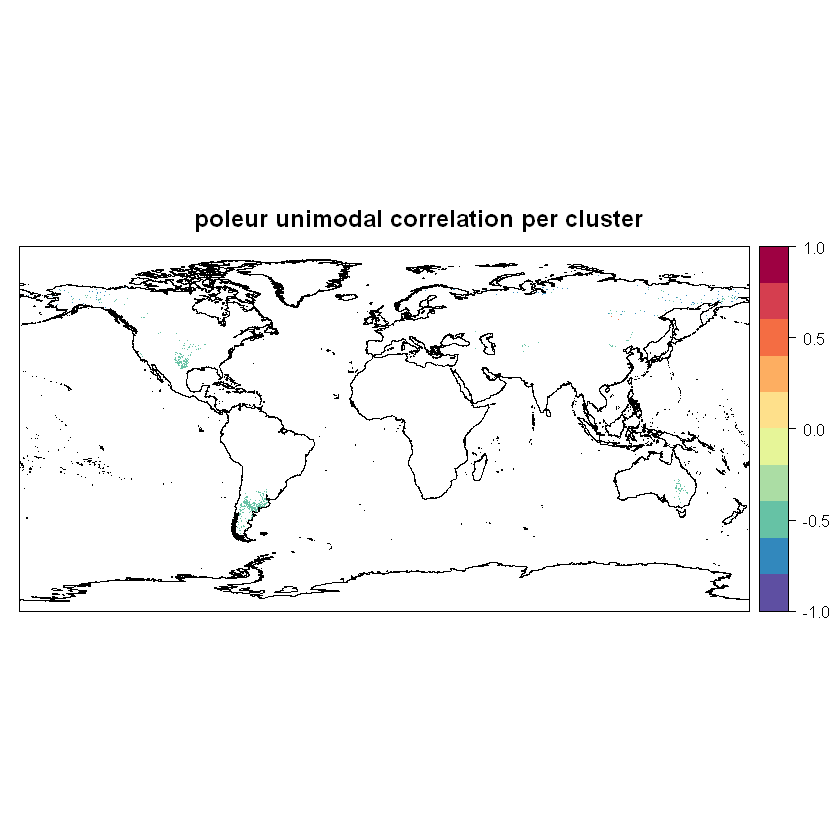

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

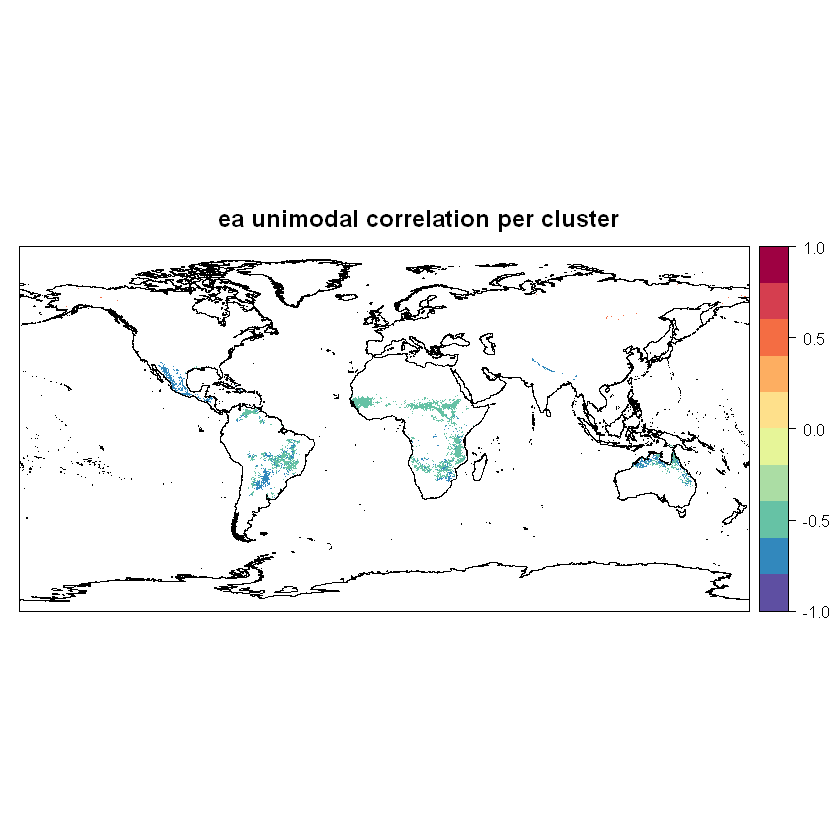

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

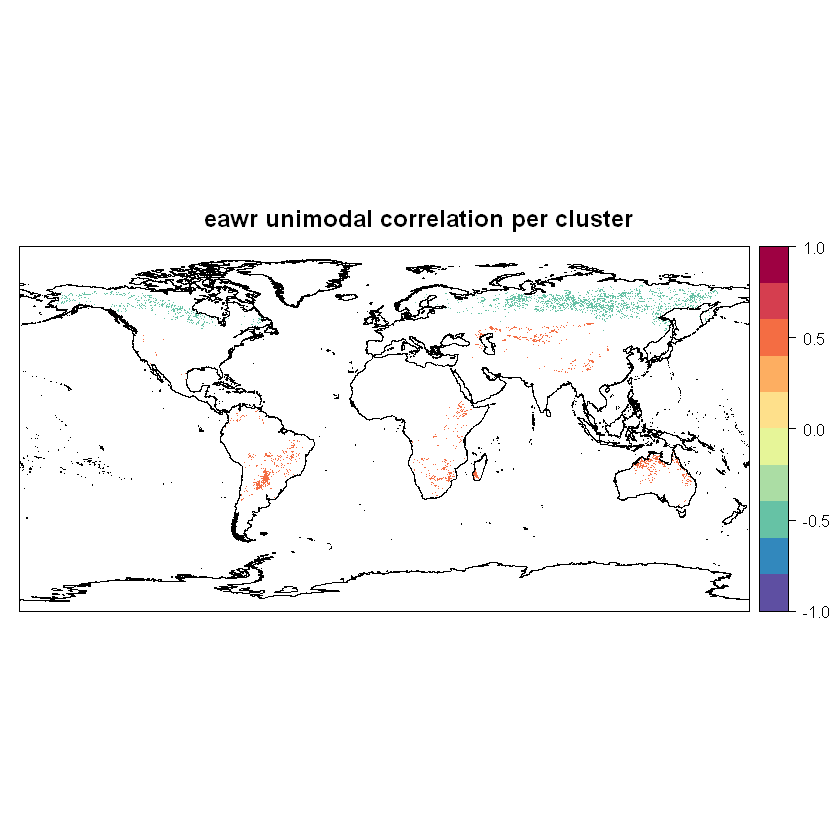

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

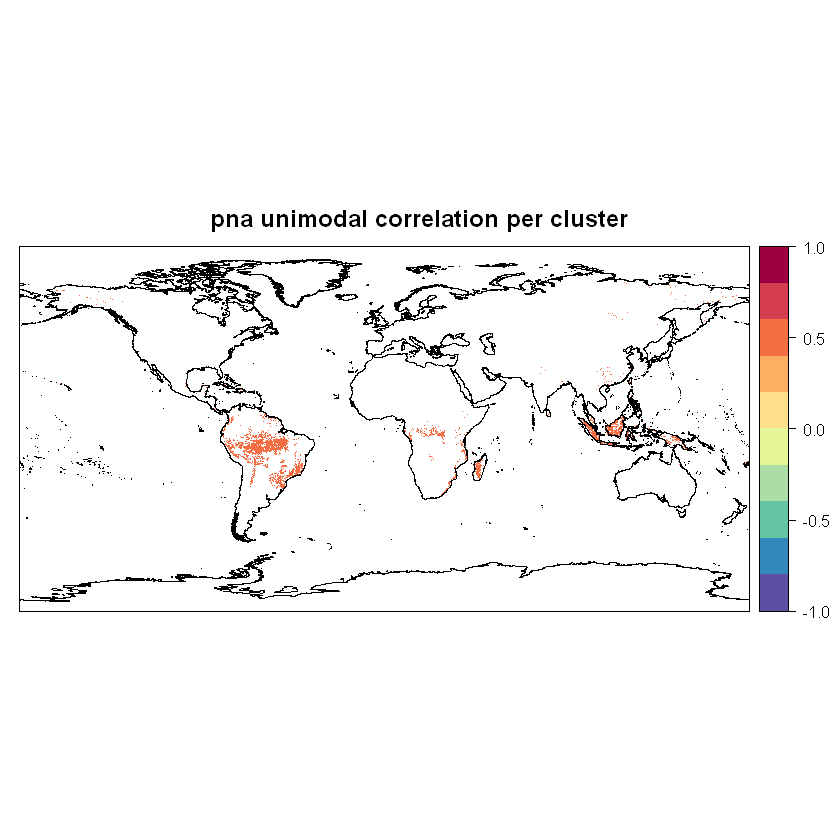

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

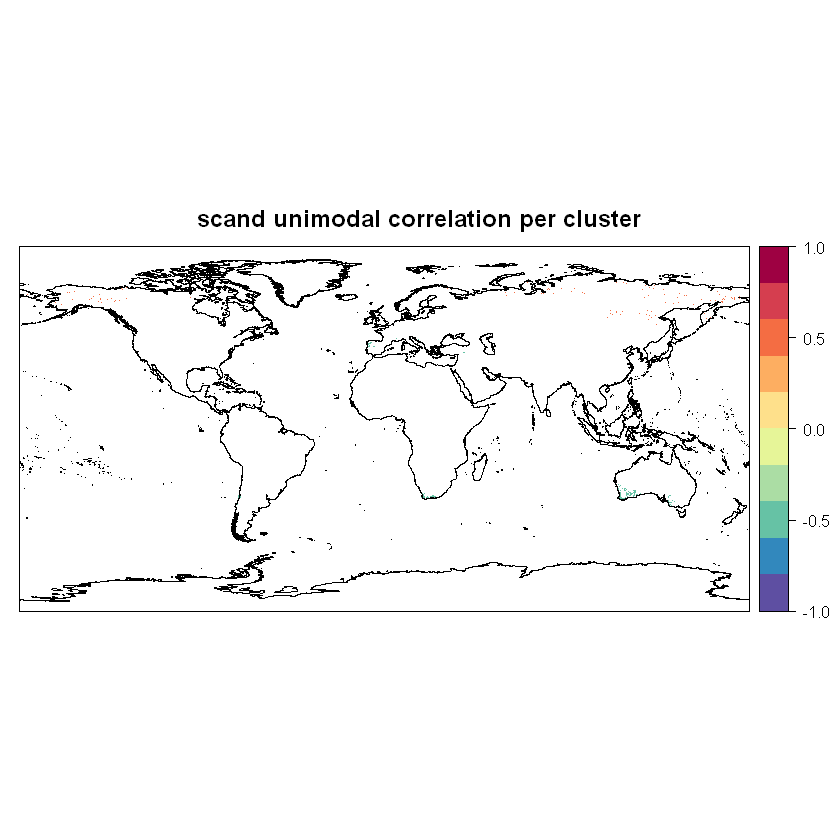

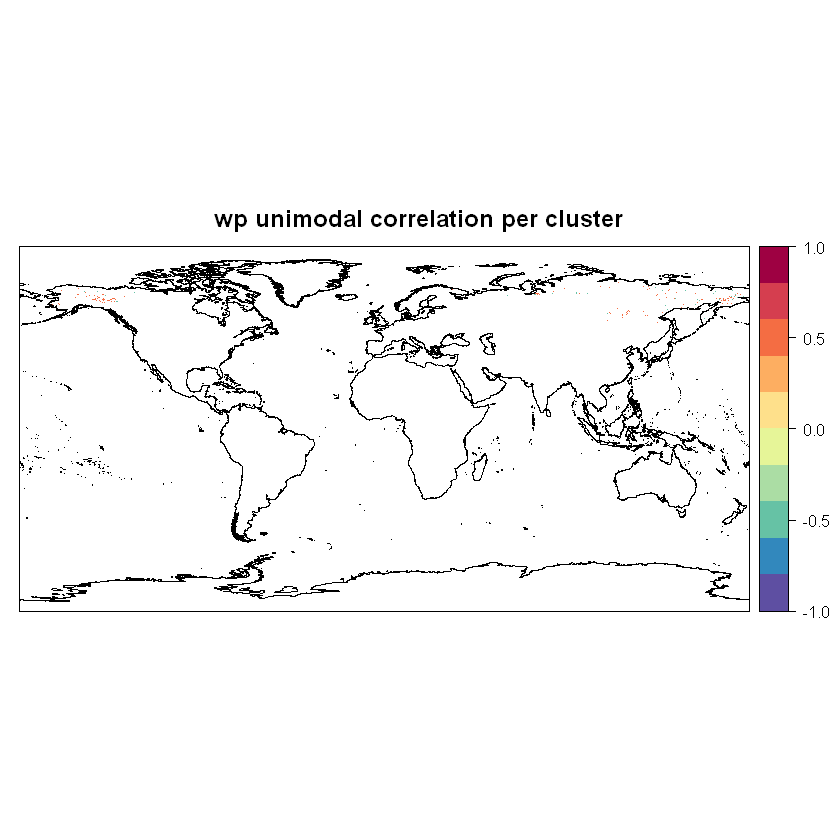

In [32]:
corr.df = masked_coords
t = 3
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df,
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df, 
                           mode = 'unimodal', t = t)
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df, 
                           mode = 'unimodal', t = t)

corr.df.lag.3 <- corr.df
save(corr.df.lag.3, file = 'corrDfAnnualClusLag3.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  28215 
Number of pixels correlated with more than  1  indexes  4031 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


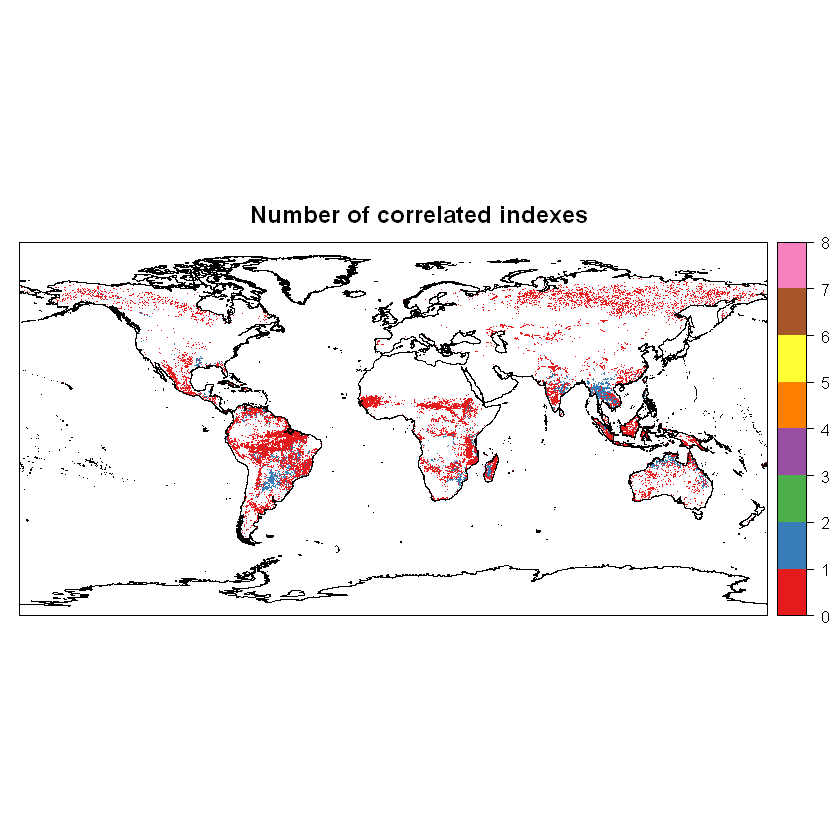

In [33]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao.pvalue<0.05), as.numeric(corr.df$poleur.pvalue<0.05), as.numeric(corr.df$ea.pvalue<0.05),
          as.numeric(corr.df$eawr.pvalue<0.05), as.numeric(corr.df$pna.pvalue<0.05), as.numeric(corr.df$nina34.pvalue<0.05), 
          as.numeric(corr.df$scand.pvalue<0.05), as.numeric(corr.df$wp.pvalue<0.05))

corr.df$suma = rowSums(v, na.rm=T)
v <- corr.df$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df$suma > i-1), '\n')
}

## Using deltas

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

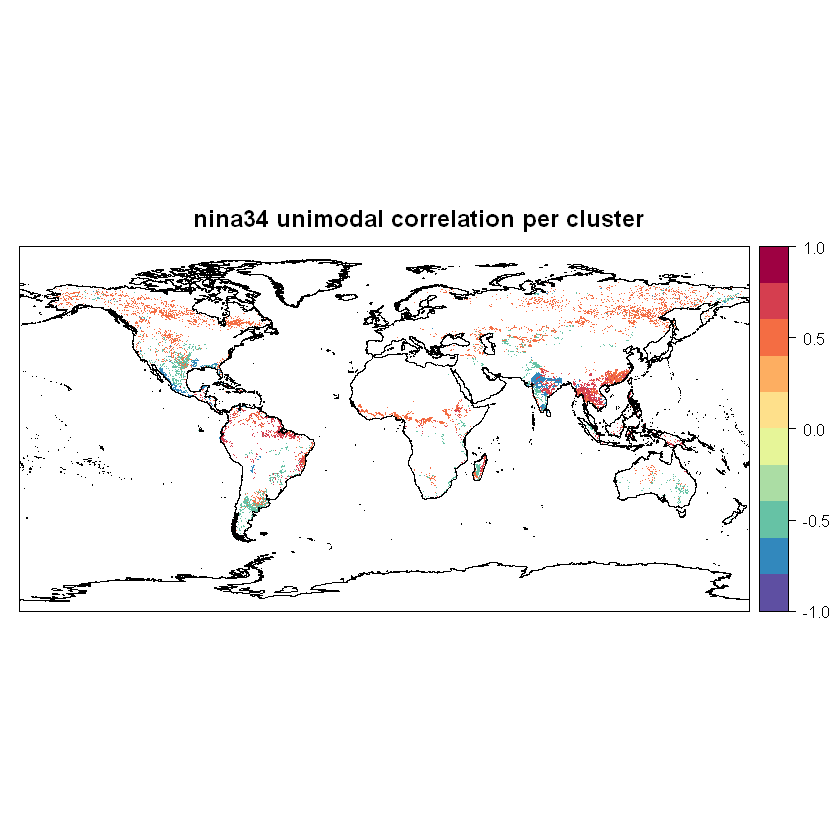

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

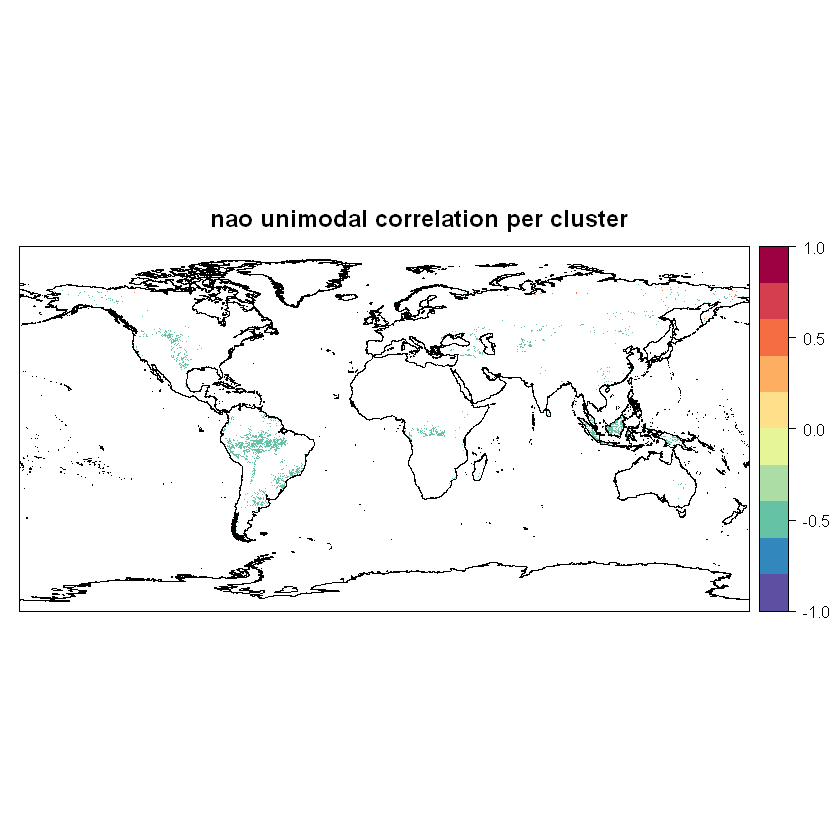

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

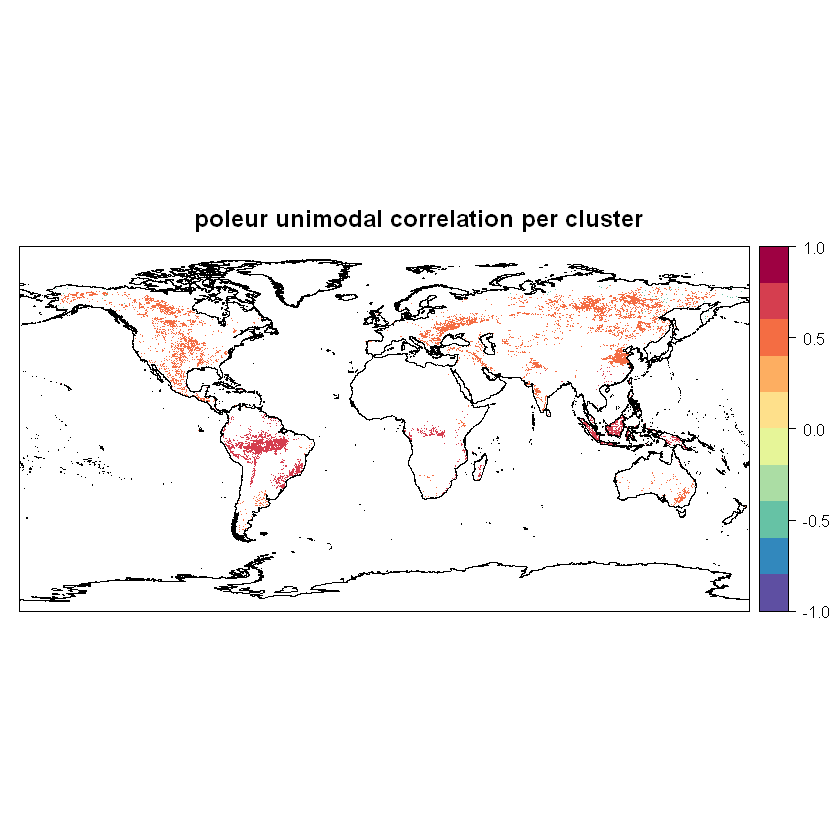

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

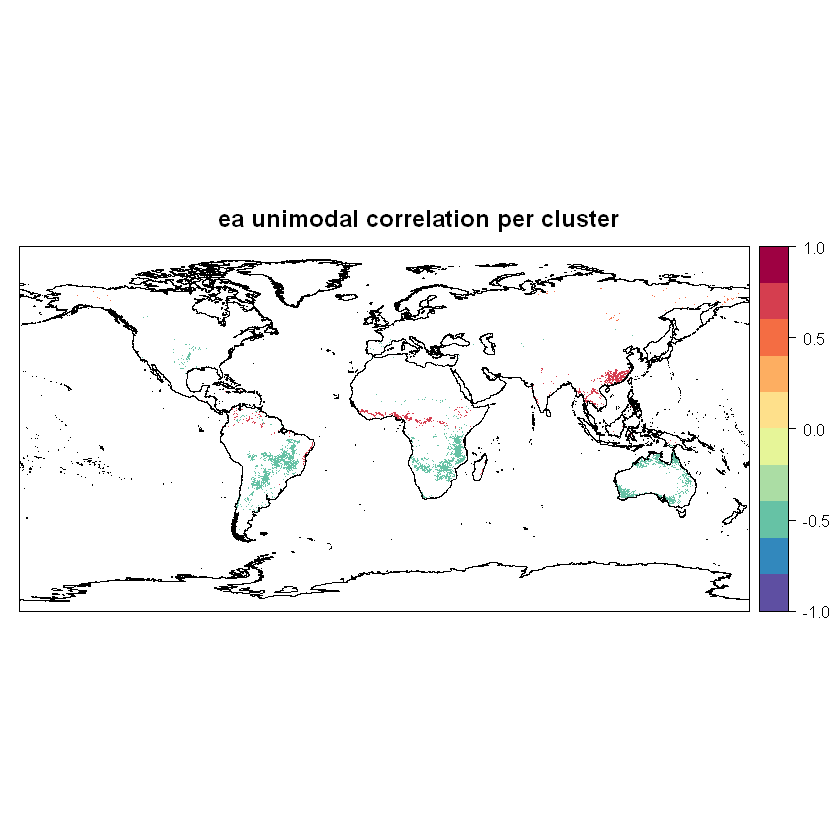

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

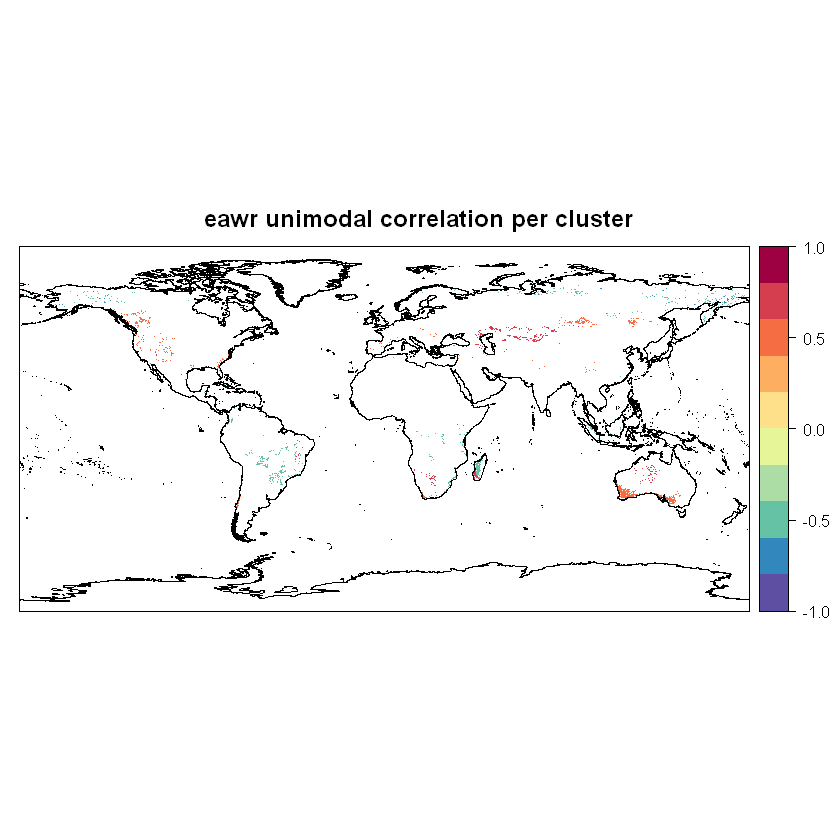

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

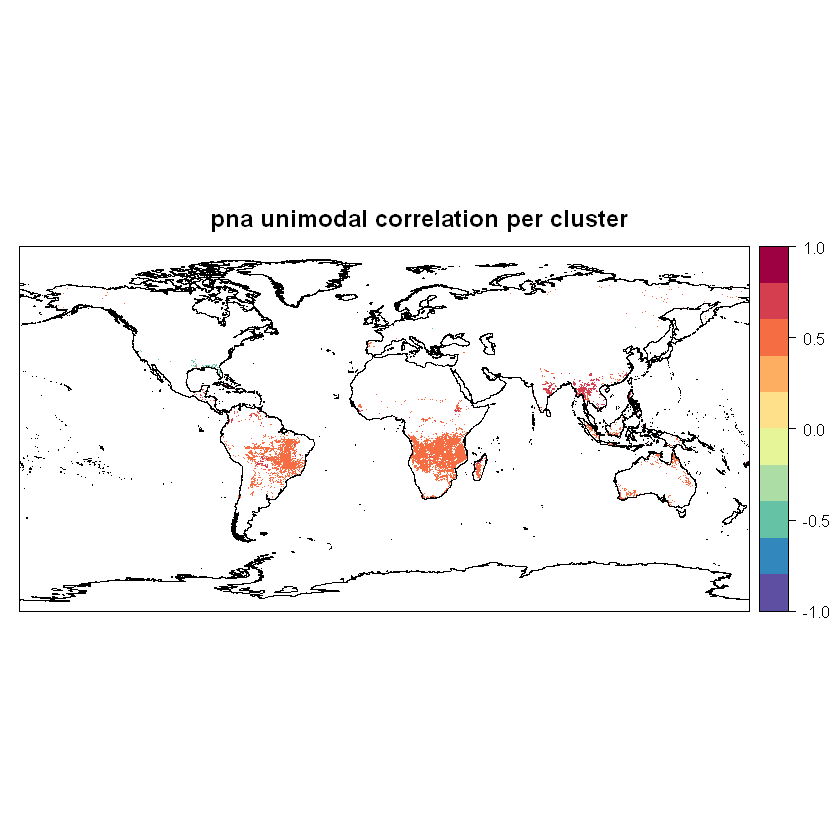

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

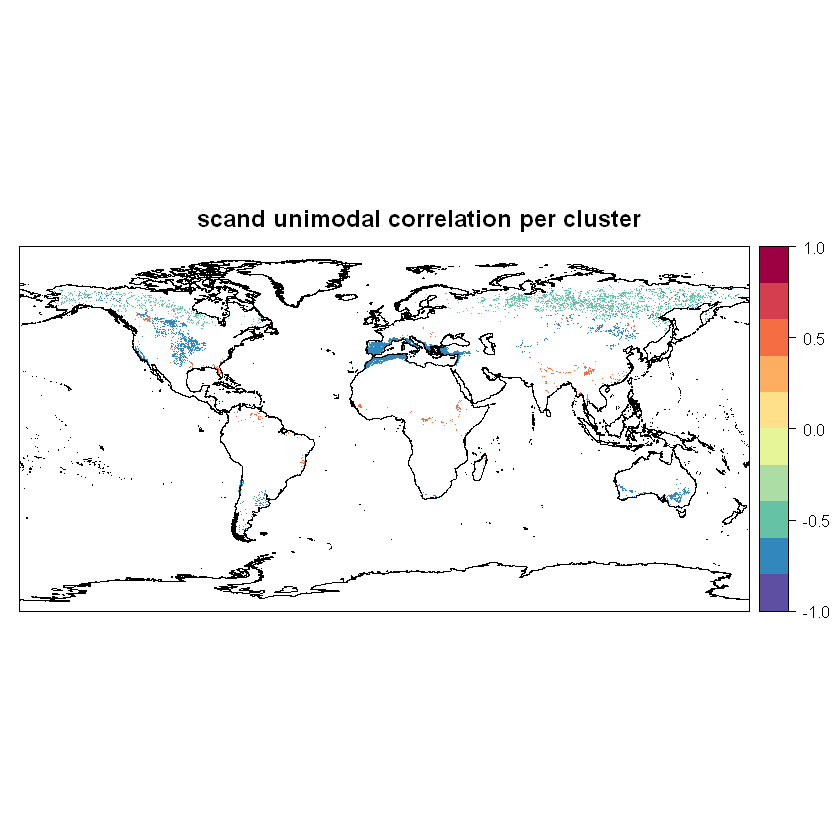

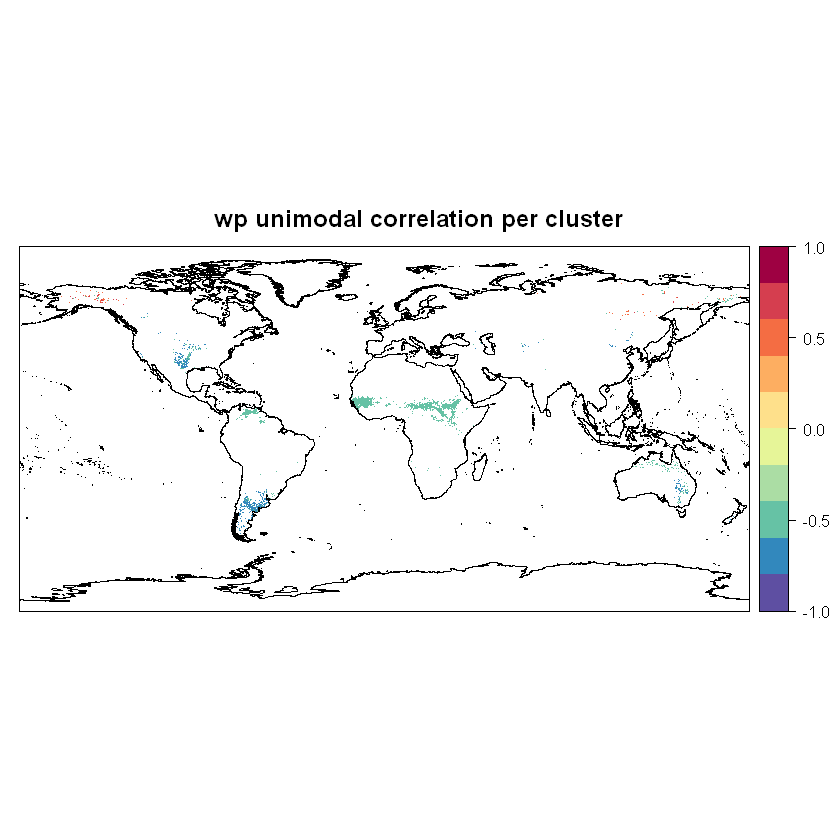

In [20]:
corr.df.delta = masked_coords
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)

#save(corr.df.delta, file = 'corrDfDeltaAnnualClus.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  55299 
Number of pixels correlated with more than  1  indexes  20987 
Number of pixels correlated with more than  2  indexes  1735 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


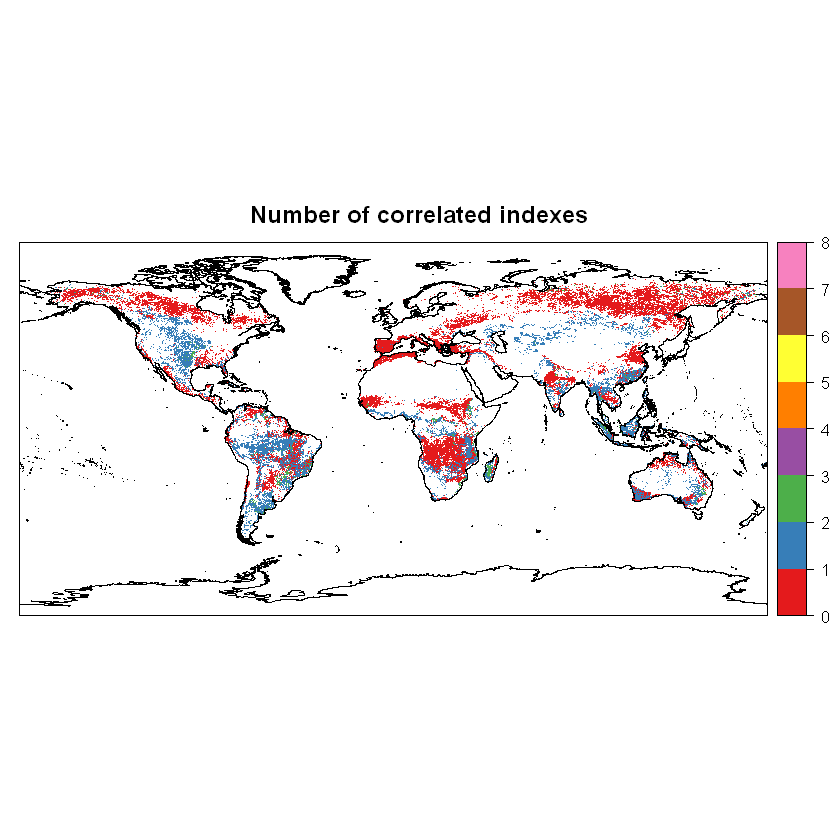

In [22]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta$nao.pvalue<0.05), as.numeric(corr.df.delta$poleur.pvalue<0.05), as.numeric(corr.df.delta$ea.pvalue<0.05),
          as.numeric(corr.df.delta$eawr.pvalue<0.05), as.numeric(corr.df.delta$pna.pvalue<0.05), as.numeric(corr.df.delta$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta$scand.pvalue<0.05), as.numeric(corr.df.delta$wp.pvalue<0.05))

corr.df.delta$suma = rowSums(v, na.rm=T)
v <- corr.df.delta$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.delta$suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

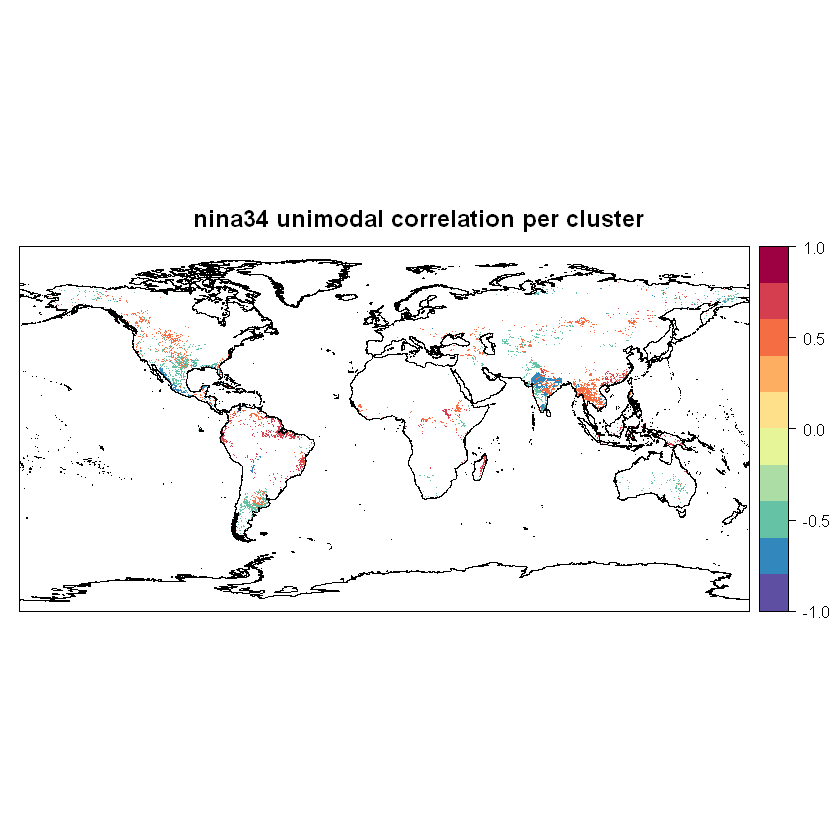

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

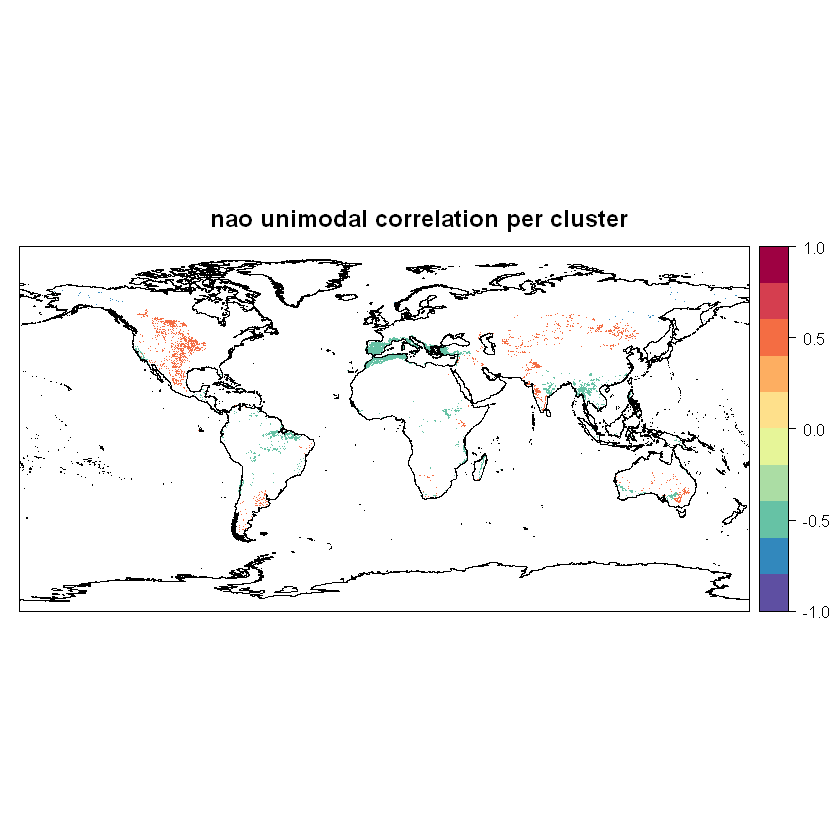

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

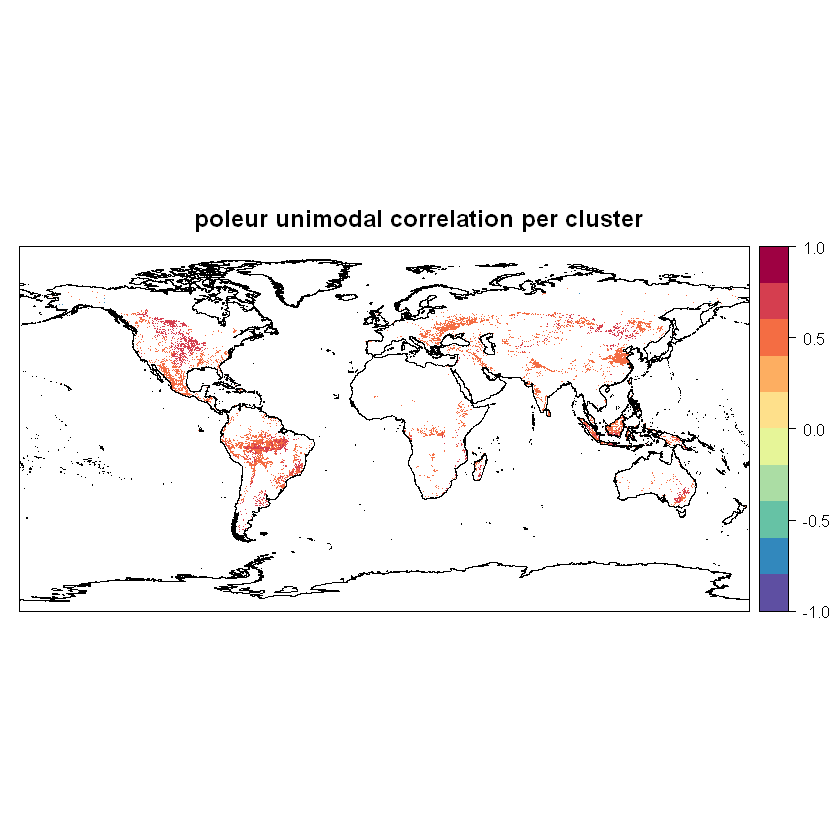

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

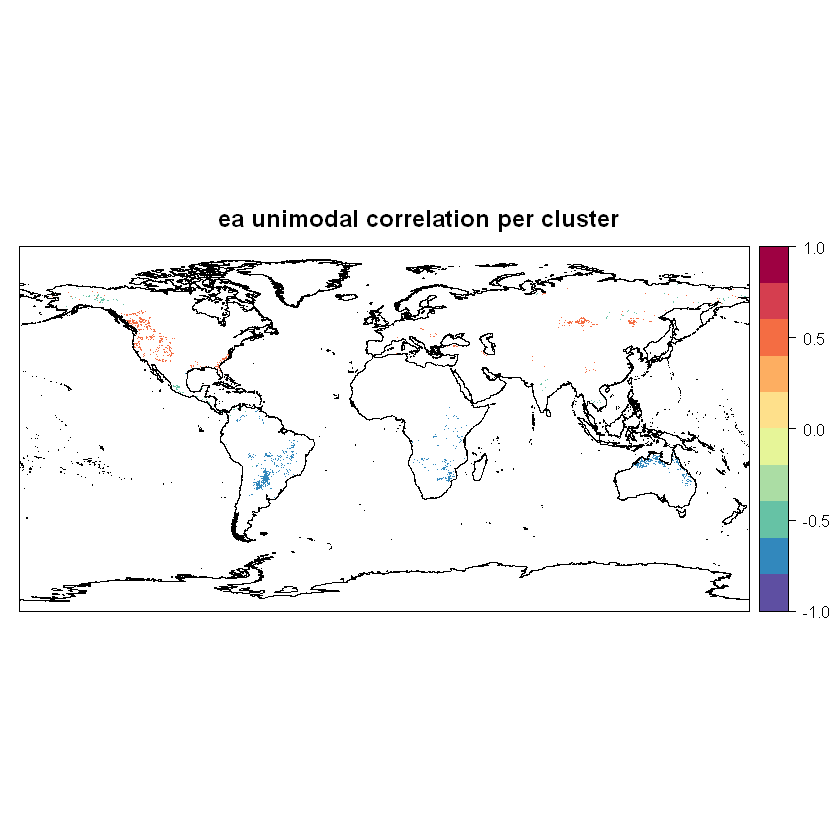

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

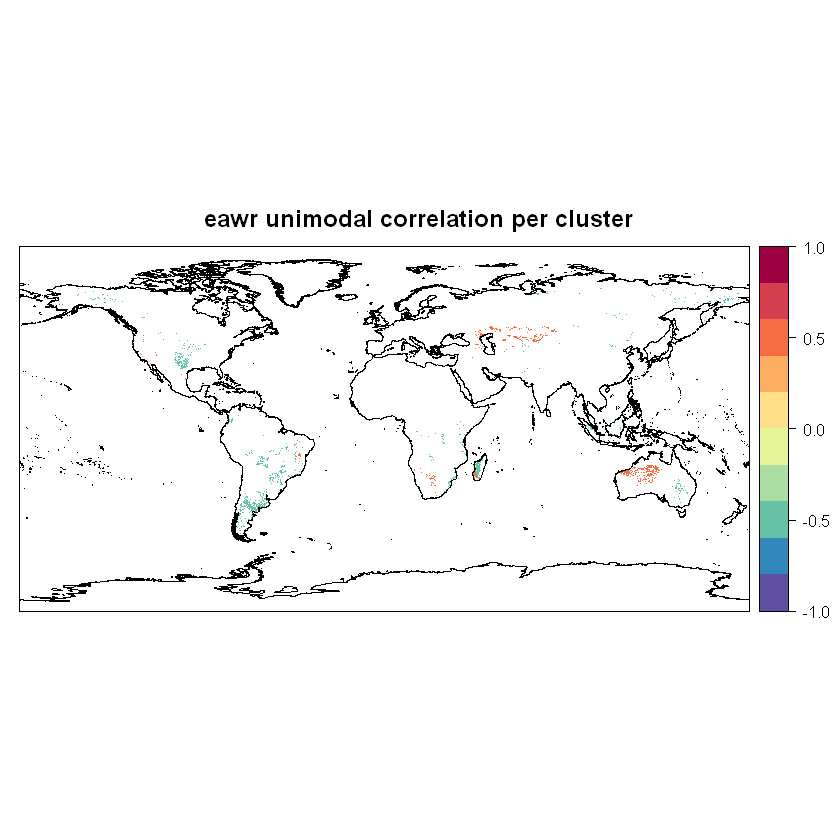

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

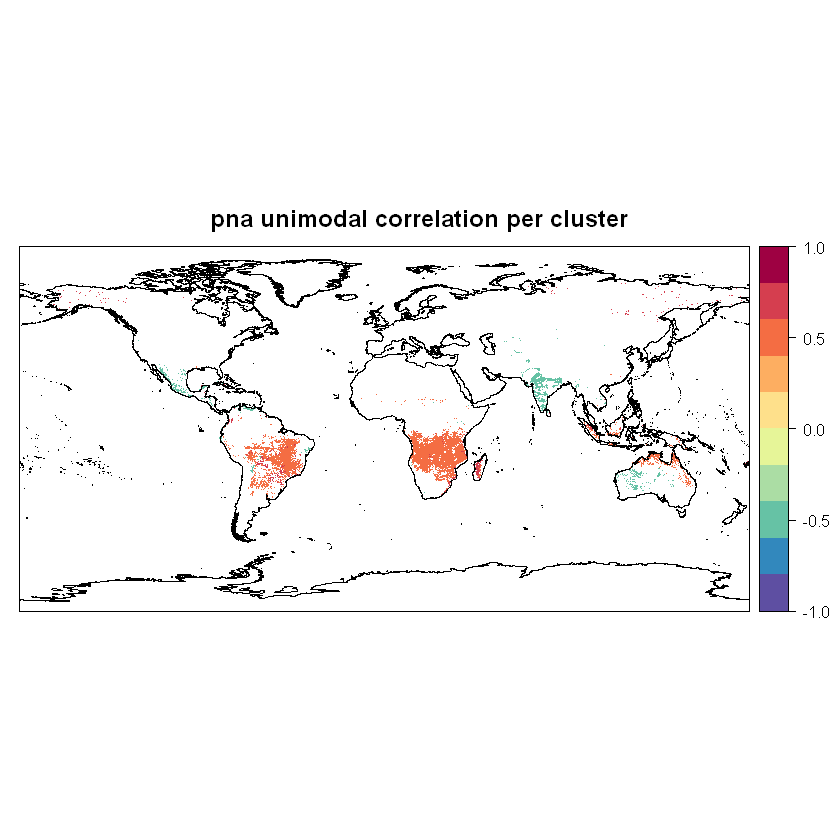

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

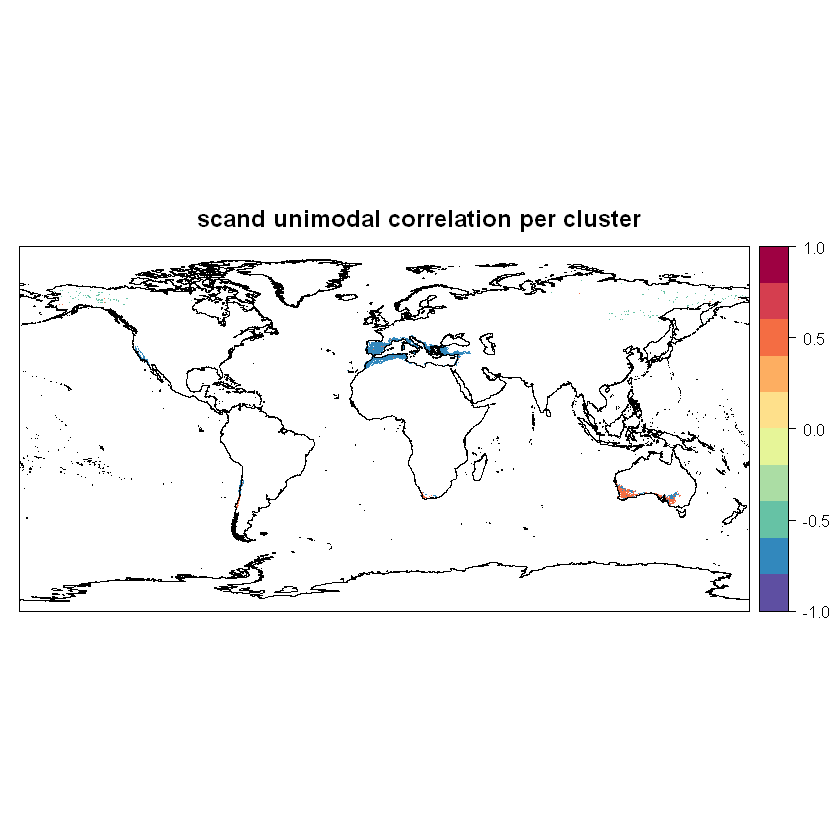

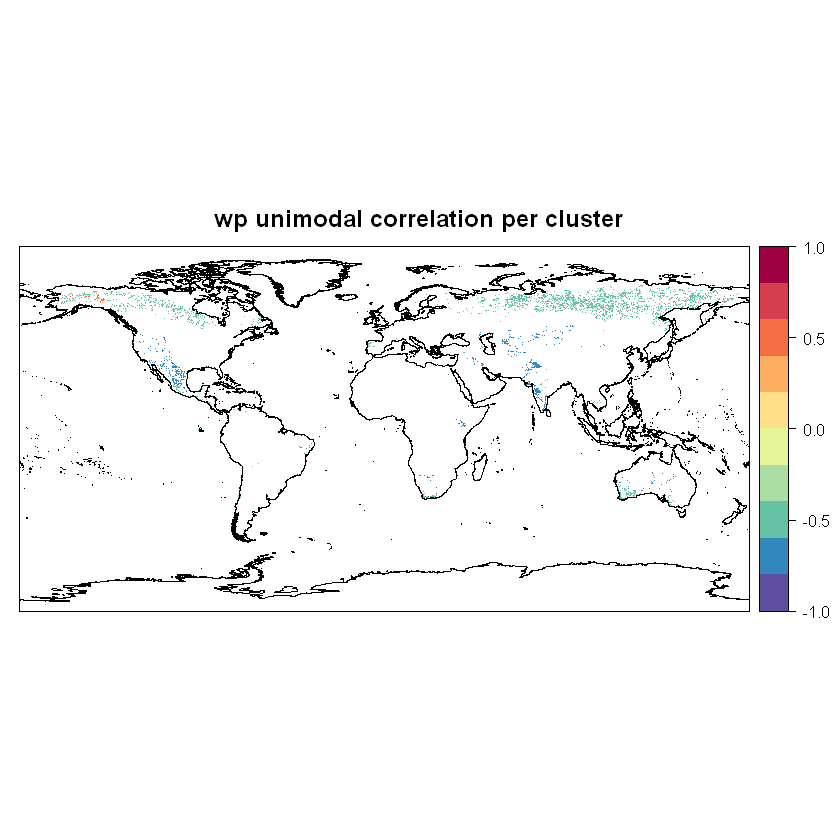

In [21]:
# With 1 month persistence
corr.df.delta.1 = masked_coords
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)

#save(corr.df.delta.1, file = 'corrDfDeltaAnnualClusLag1.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  48448 
Number of pixels correlated with more than  1  indexes  14371 
Number of pixels correlated with more than  2  indexes  2198 
Number of pixels correlated with more than  3  indexes  1327 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


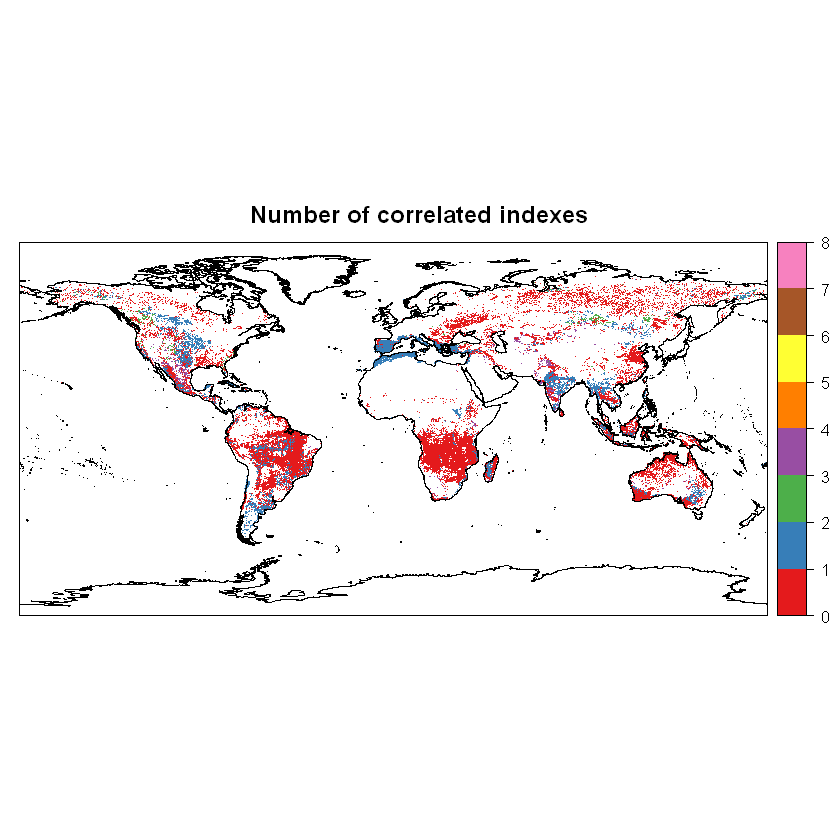

In [23]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta.1$nao.pvalue<0.05), as.numeric(corr.df.delta.1$poleur.pvalue<0.05), as.numeric(corr.df.delta.1$ea.pvalue<0.05),
          as.numeric(corr.df.delta.1$eawr.pvalue<0.05), as.numeric(corr.df.delta.1$pna.pvalue<0.05), as.numeric(corr.df.delta.1$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.1$scand.pvalue<0.05), as.numeric(corr.df.delta.1$wp.pvalue<0.05))

corr.df.delta.1$suma = rowSums(v, na.rm=T)
v <- corr.df.delta.1$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.delta.1$suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

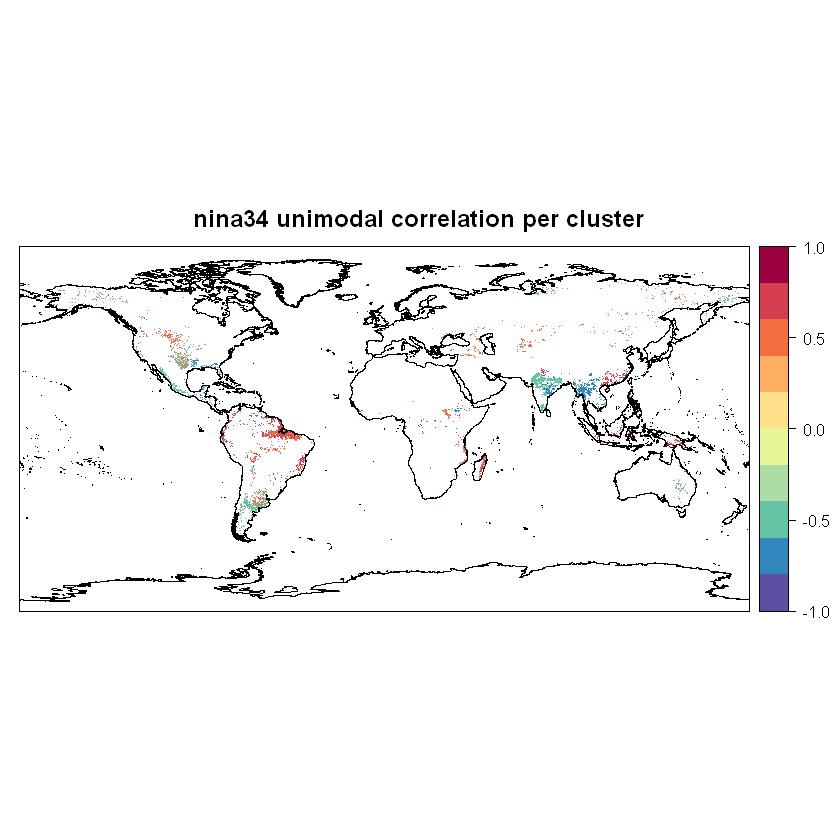

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

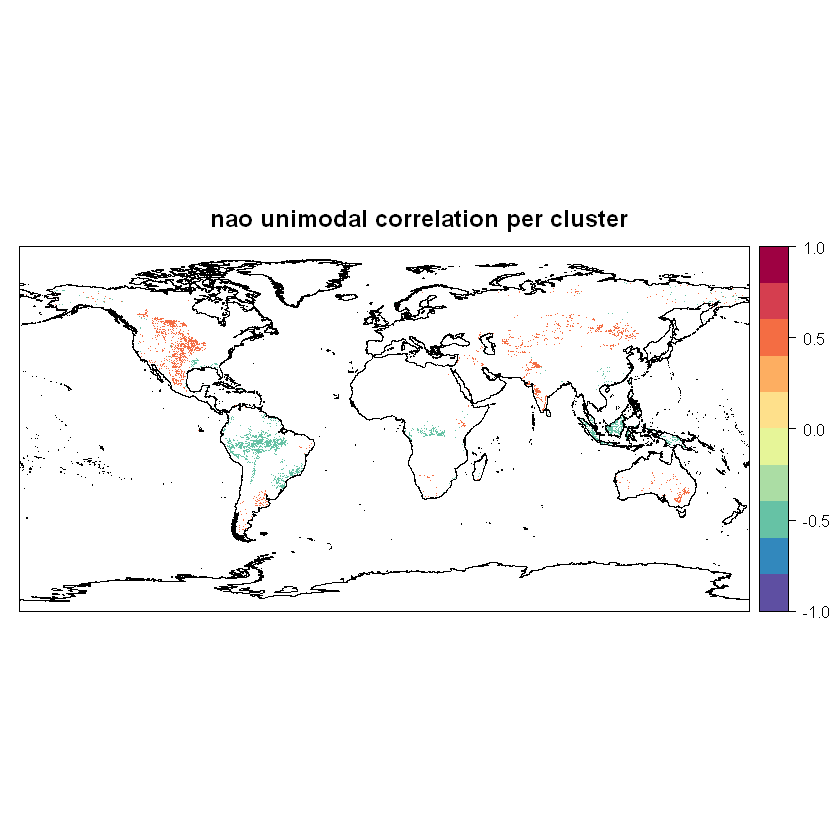

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

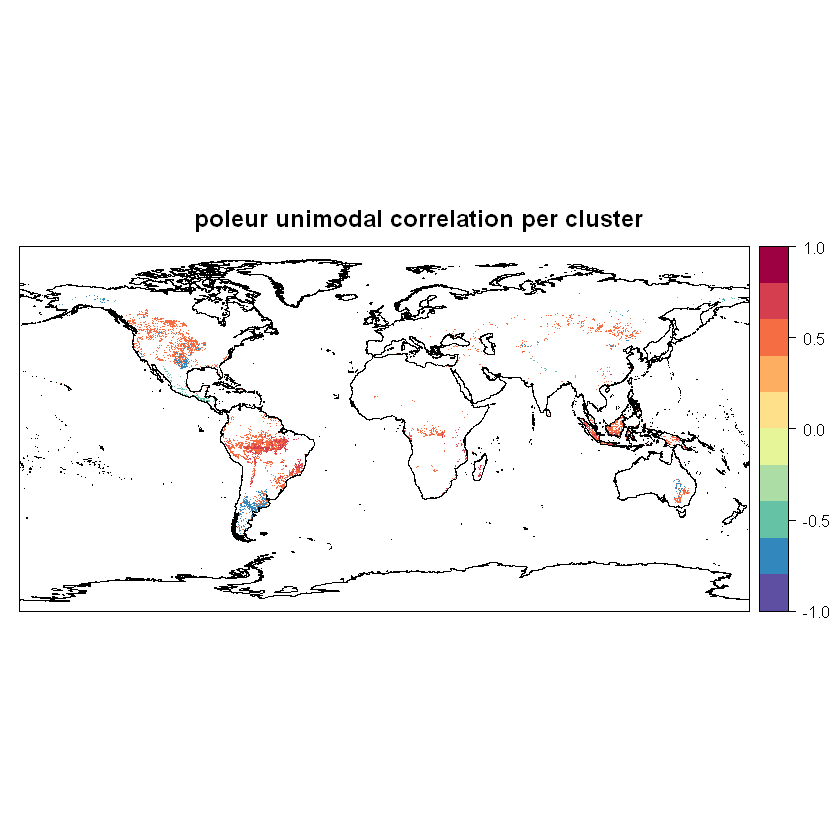

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

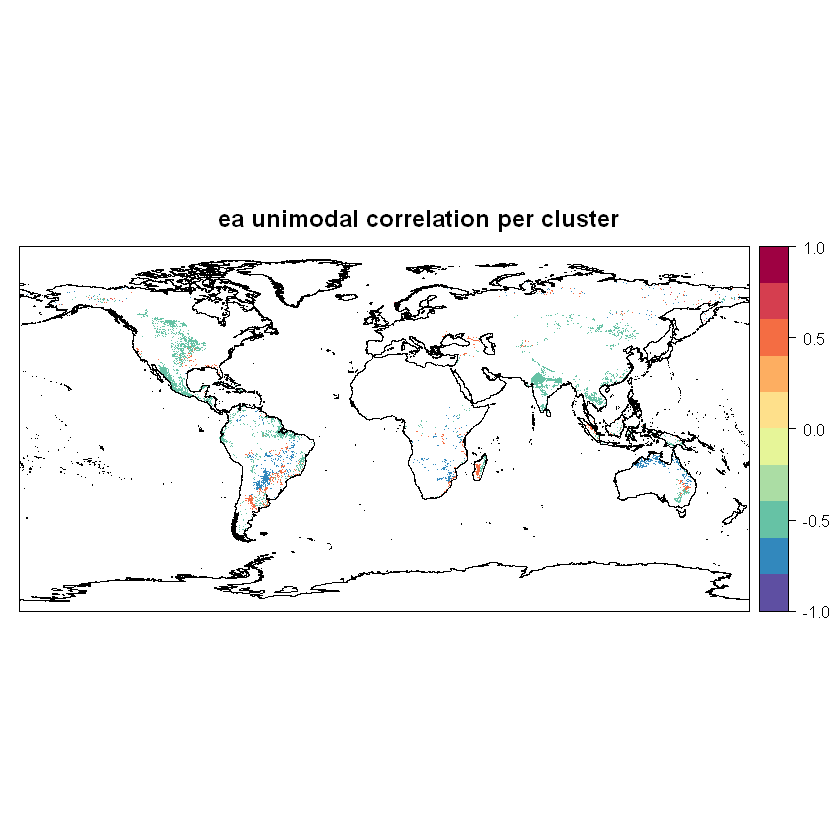

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

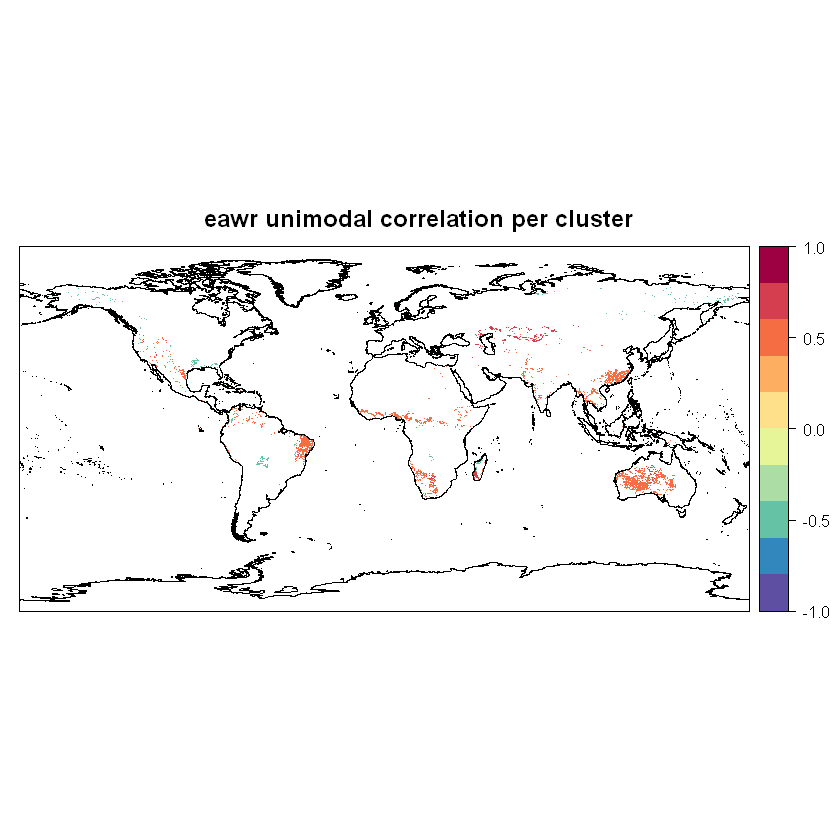

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

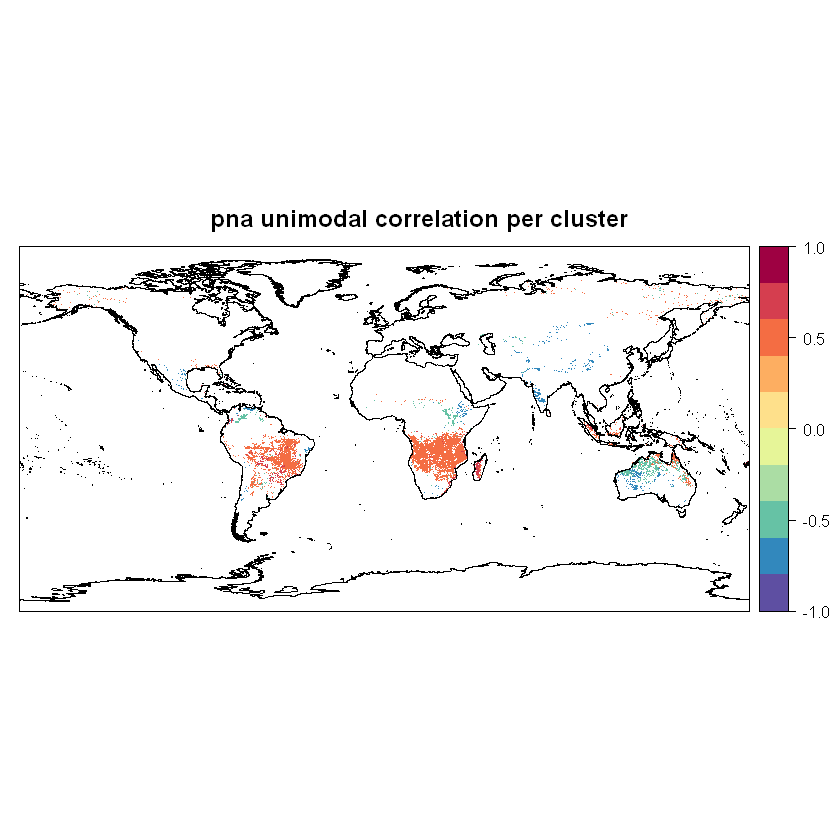

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

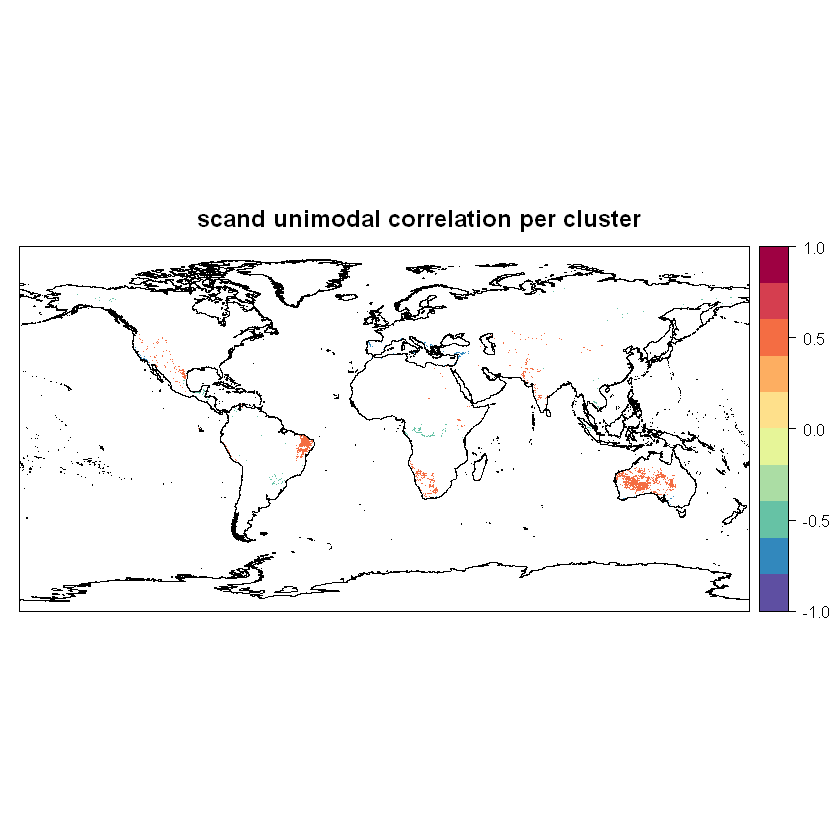

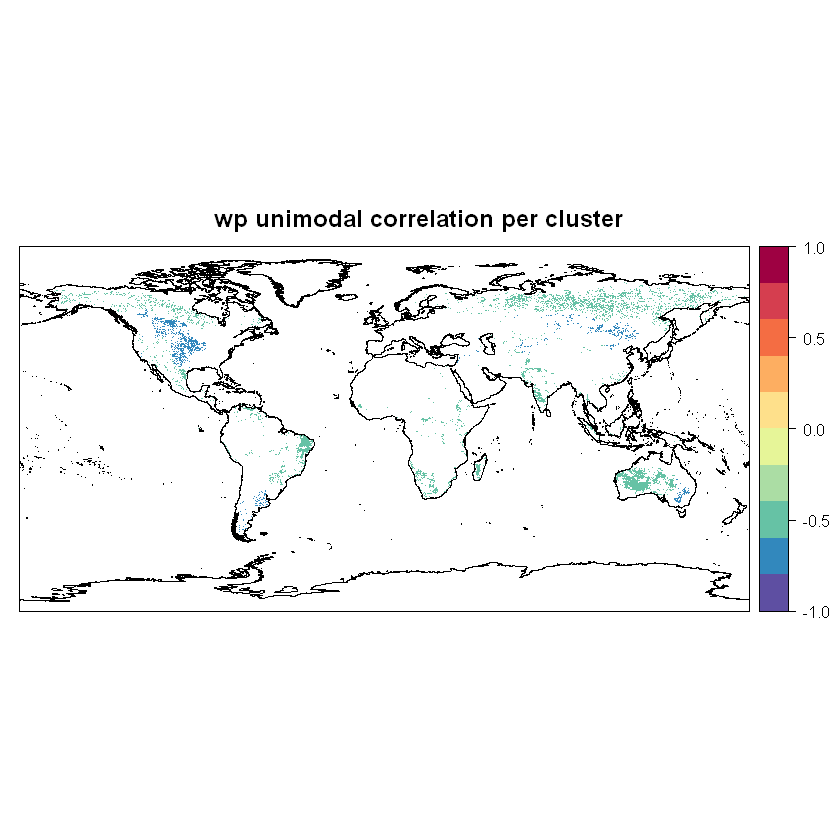

In [24]:
# With 2 months persistence
corr.df.delta.2 = masked_coords
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)

#save(corr.df.delta.2, file = 'corrDfDeltaAnnualClusLag2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  44088 
Number of pixels correlated with more than  1  indexes  16927 
Number of pixels correlated with more than  2  indexes  6055 
Number of pixels correlated with more than  3  indexes  2209 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


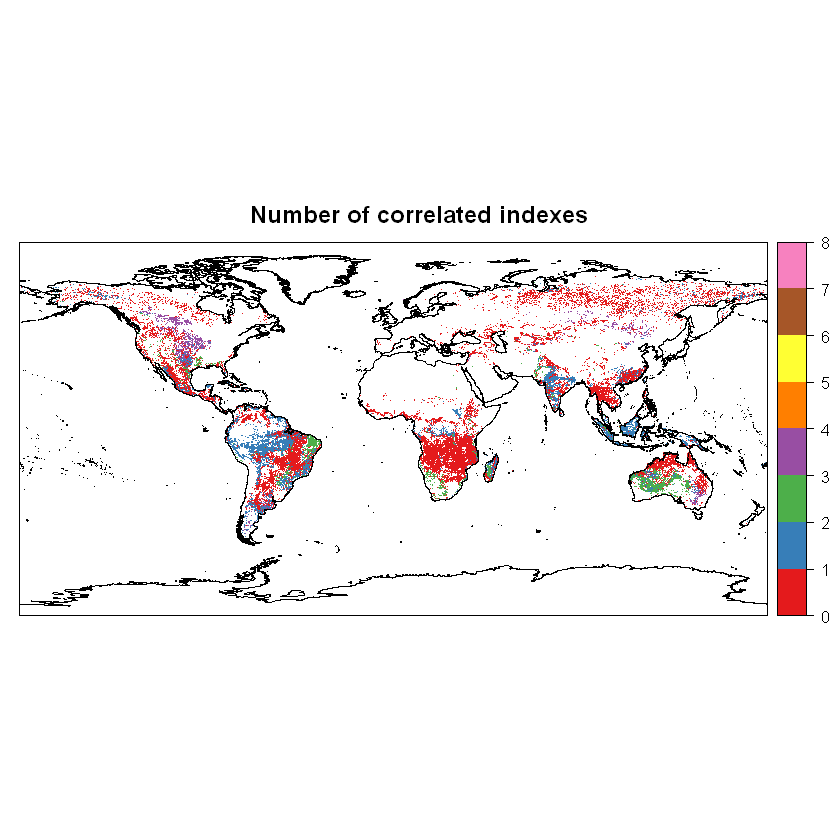

In [25]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta.2$nao.pvalue<0.05), as.numeric(corr.df.delta.2$poleur.pvalue<0.05), as.numeric(corr.df.delta.2$ea.pvalue<0.05),
          as.numeric(corr.df.delta.2$eawr.pvalue<0.05), as.numeric(corr.df.delta.2$pna.pvalue<0.05), as.numeric(corr.df.delta.2$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.2$scand.pvalue<0.05), as.numeric(corr.df.delta.2$wp.pvalue<0.05))

corr.df.delta.2$suma = rowSums(v, na.rm=T)
v <- corr.df.delta.2$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.delta.2$suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

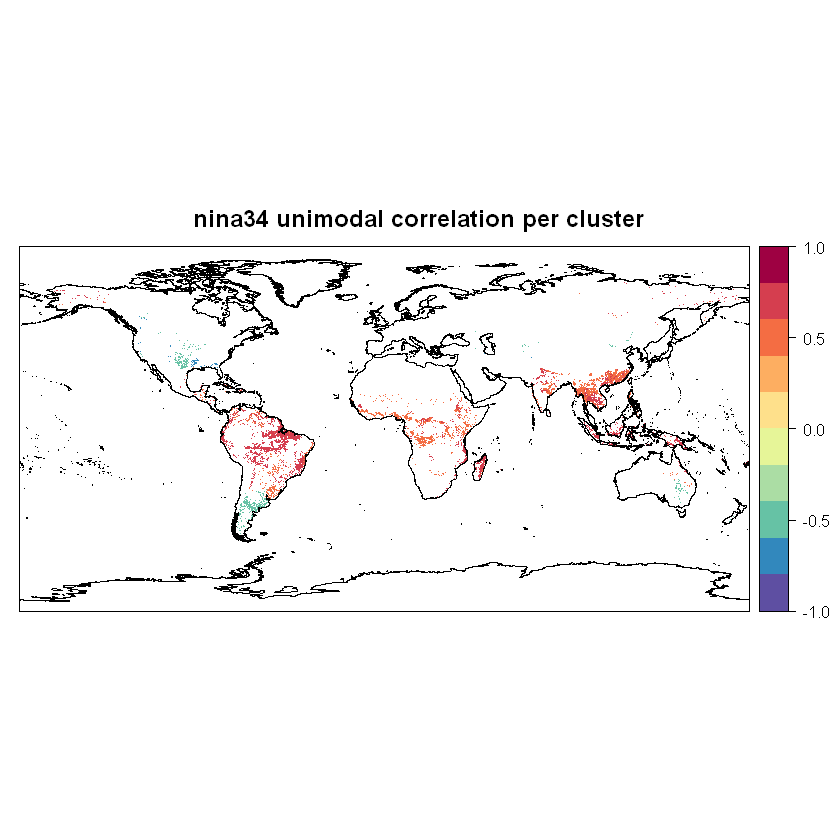

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

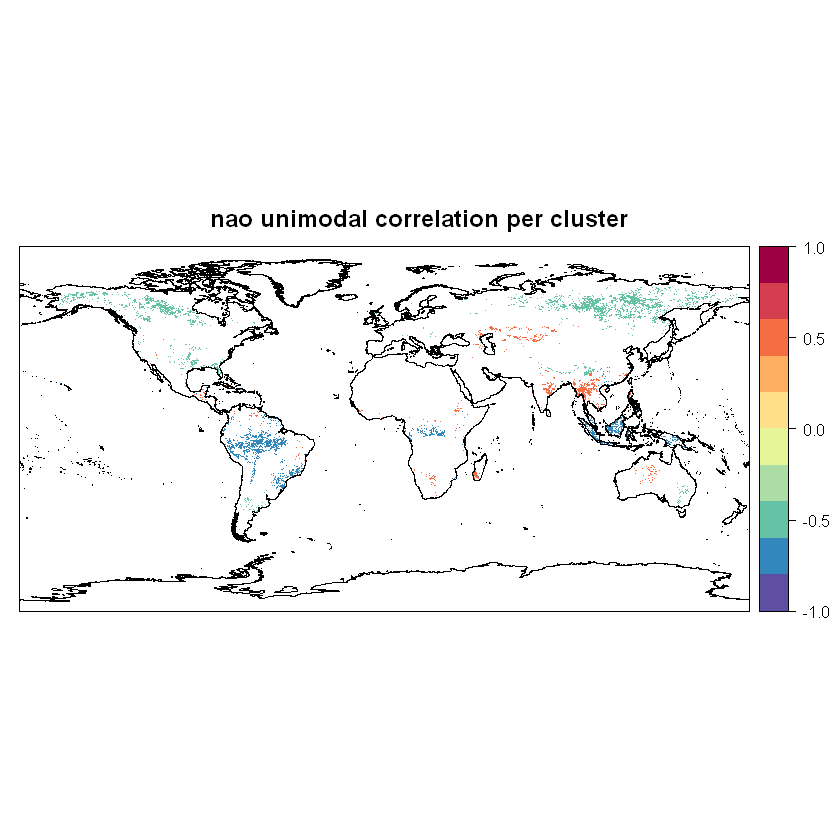

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

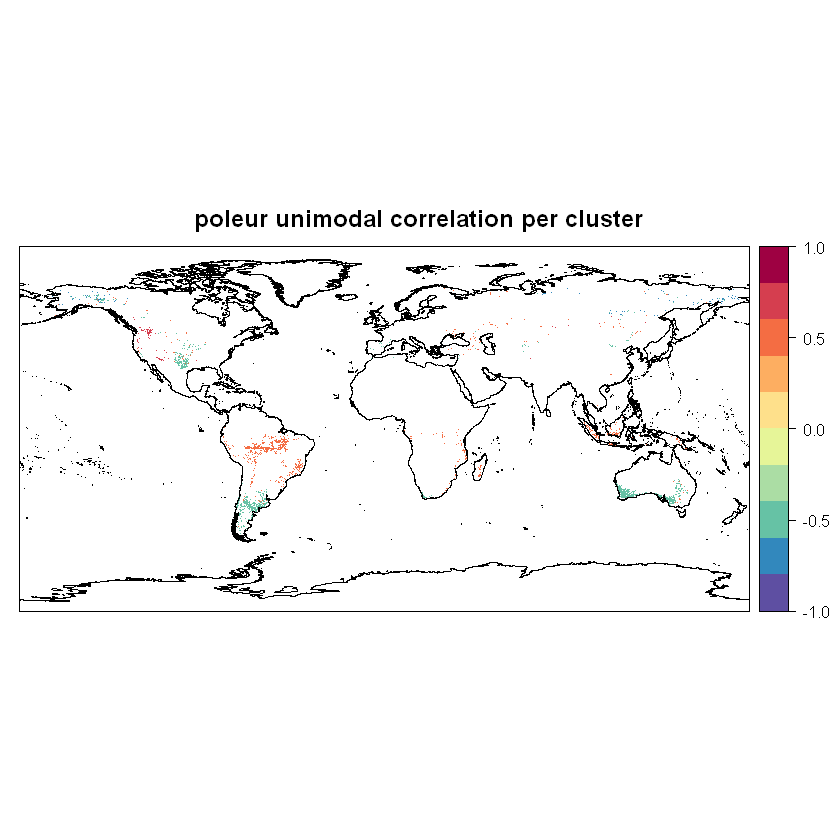

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

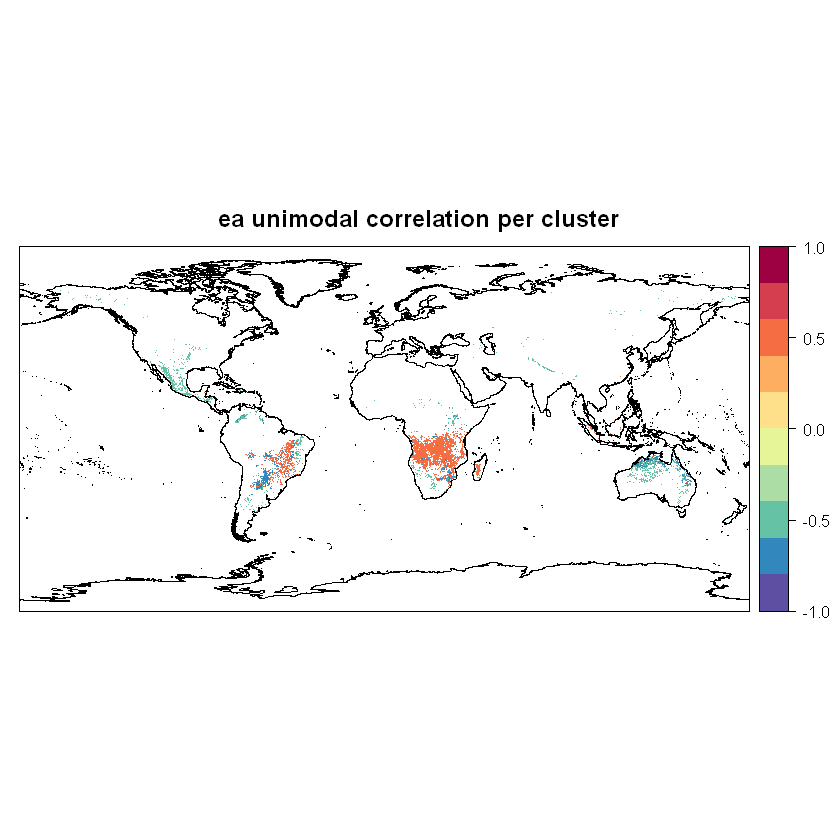

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

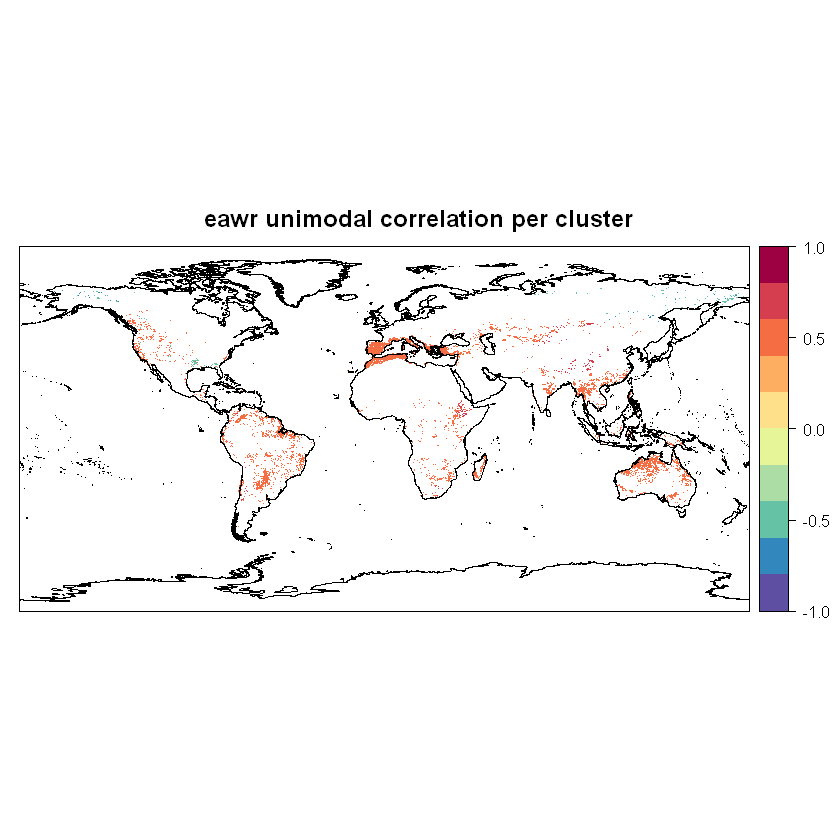

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

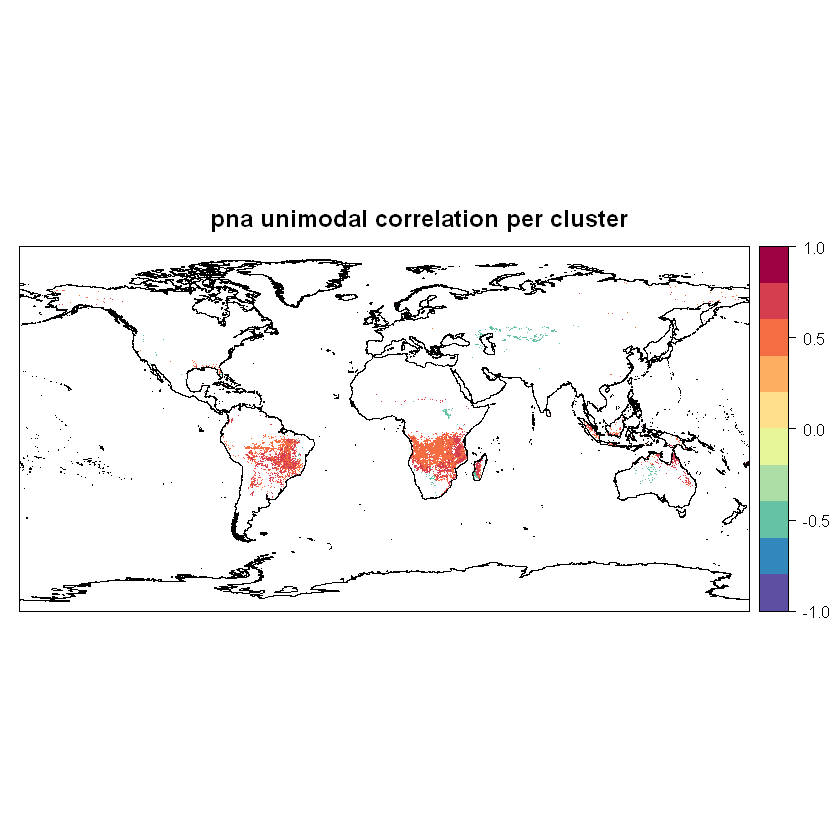

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

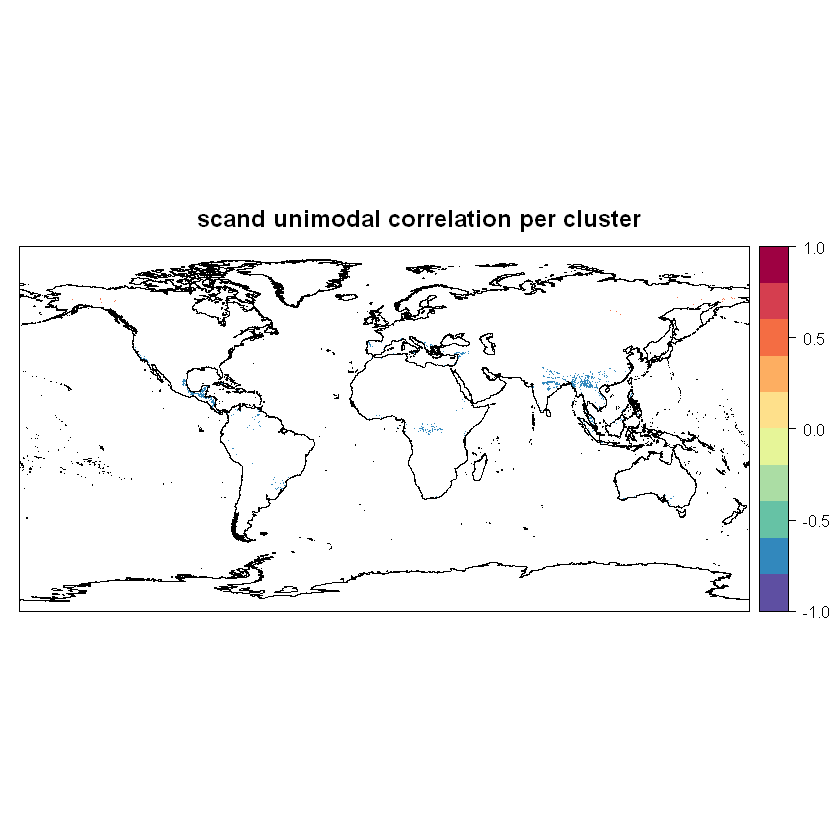

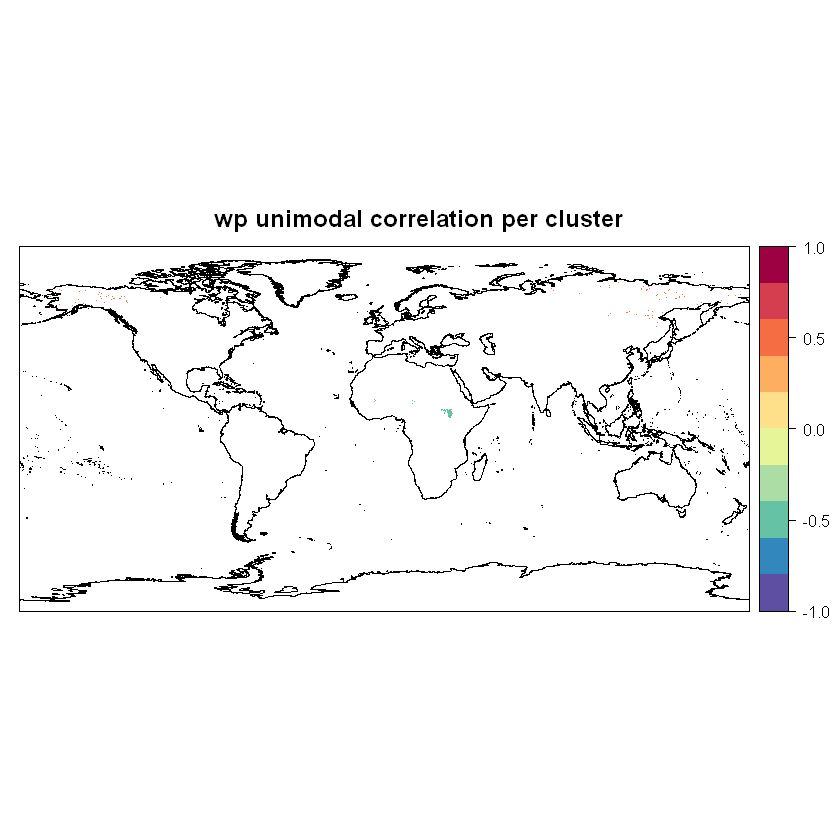

In [26]:
# With 3 months persistence
corr.df.delta.3 = masked_coords
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)

#save(corr.df.delta.3, file = 'corrDfDeltaAnnualClusLag3.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  41551 
Number of pixels correlated with more than  1  indexes  14847 
Number of pixels correlated with more than  2  indexes  3519 
Number of pixels correlated with more than  3  indexes  23 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


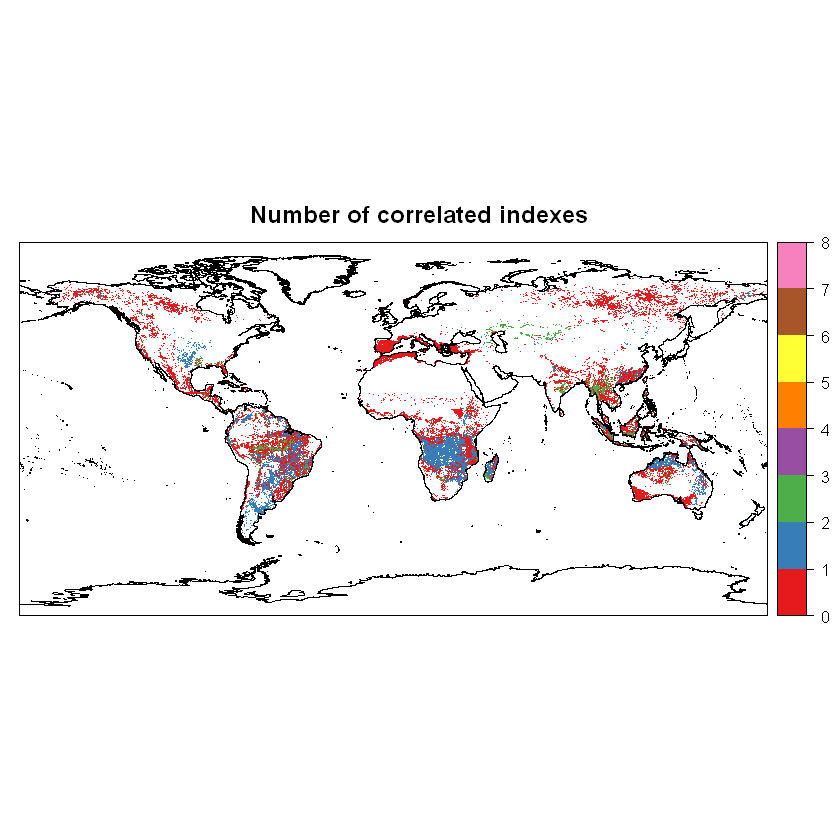

In [27]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta.3$nao.pvalue<0.05), as.numeric(corr.df.delta.3$poleur.pvalue<0.05), as.numeric(corr.df.delta.3$ea.pvalue<0.05),
          as.numeric(corr.df.delta.3$eawr.pvalue<0.05), as.numeric(corr.df.delta.3$pna.pvalue<0.05), as.numeric(corr.df.delta.3$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.3$scand.pvalue<0.05), as.numeric(corr.df.delta.3$wp.pvalue<0.05))

corr.df.delta.3$suma = rowSums(v, na.rm=T)
v <- corr.df.delta.3$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.delta.3$suma > i-1), '\n')
}